# <font color='Blue'>📦 Projeto: Modelagem do Tempo Total de Entrega</font>
<hr style='border: 2px solid Blue;'>

# <font color='orange' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid orange;'>

In [179]:
%load_ext autoreload
%autoreload 2

from src.functions import *
import warnings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings
# from pyspark.sql import SparkSession, Row 
# from pyspark.sql.functions import *
# import pyspark.sql.functions as F

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <font color='orange' style='font-size: 40px;'> 1. Leitura do Dataset </font>
<hr style='border: 2px solid orange;'>

https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center?resource=download

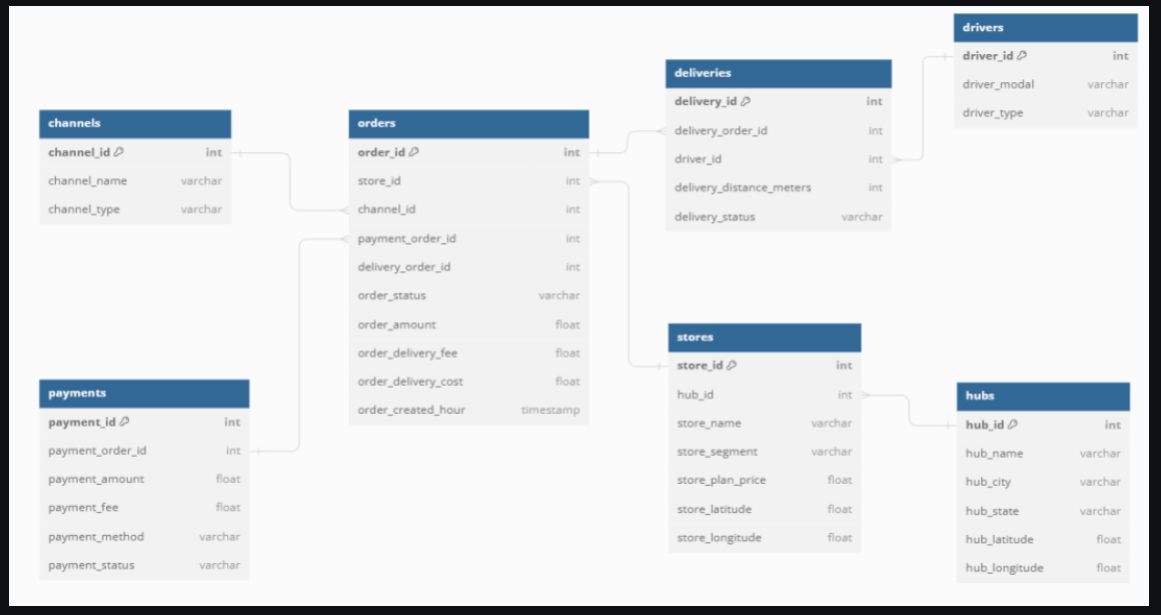


## 1.1.1) Channels

> 1. Este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os good e food de nossos lojistas.

- **Channel ID:** Identificador único do canal de vendas.
- **Channel Name:** Nome do canal de vendas.
- **Channel Type:** Tipo de canal de vendas.

## 1.1.2) Deliveries

> 1. Este dataset possui informações sobre as entregas realizadas por nossos entregadores parceiros.

- **Delivery Id:** Identificador único da entrega.
- **Delivery Order ID:** Identificador único do pedido.
- **Driver Id:** Identificador do entregador responsável pela entrega.
- **Delivery Distance Meters:** Distância total percorrida para a entrega, em metros.
- **Delivery Status:** Status atual da entrega.

## 1.1.3) Drivers

> 1. Este dataset possui informações sobre os entregadores parceiros. Eles ficam em nossos hubs e toda vez que um pedido é processado, são eles fazem as entregas na casa dos consumidores.

- **Driver Id:** Identificador único do entregador.
- **Driver Modal:** Modalidade de transporte utilizada pelo entregador.
- **Driver Type:** Tipo de entregador.

## 1.1.4) Hubs

> 1. Este dataset possui informações sobre os hubs do Delivery Center. Entenda que os Hubs são os centros de distribuição dos pedidos e é dali que saem as entregas.

- **Hub ID:** Identificador único do hub.
- **Hub Name:** Nome do hub.
- **Hub City:** Cidade onde o hub está localizado.
- **Hub State:** Estado onde o hub está localizado.
- **Hub Latitude:** Latitude da localização do hub.
- **Hub Longitude:** Longitude da localização do hub.

## 1.1.5) Orders

> 1. Este dataset possui informações sobre as vendas processadas através da plataforma do Delivery Center.

- **Delivery Order ID:** Identificador único do pedido.
- **Store ID:** Identificador da loja que recebeu o pedido.
- **Channel ID:** Identificador do canal pelo qual o pedido foi realizado.
- **Order Status:** Status atual do pedido.
- **Order Amount:** Valor total do pedido.
- **Order Delivery Fee:** Taxa de entrega cobrada ao cliente.
- **Order Delivery Cost:** Custo da entrega para a plataforma ou loja.
- **Order Created Hour:** Hora em que o pedido foi criado.
- **Order Created Minute:** Minuto em que o pedido foi criado.
- **Order Created Day:** Dia em que o pedido foi criado.
- **Order Created Month:** Mês em que o pedido foi criado.
- **Order Created Year:** Ano em que o pedido foi criado.
- **Order Moment Created:** Momento exato em que o pedido foi criado.
- **Order Moment Accepted:** Momento em que o pedido foi aceito pela loja.
- **Order Moment Ready:** Momento em que o pedido ficou pronto para entrega.
- **Order Moment Collected:** Momento em que o pedido foi coletado pelo entregador.
- **Order Moment In Expedition:** Momento em que o pedido entrou em expedição.
- **Order Moment Delivering:** Momento em que o pedido está sendo entregue.
- **Order Moment Delivered:** Momento em que o pedido foi entregue ao cliente.
- **Order Moment Finished:** Momento em que o pedido foi finalizado no sistema.

## 1.1.6) Payments

> 1. Este dataset possui informações sobre os pagamentos realizados ao Delivery Center.

- **Payment ID:** Identificador único do pagamento.
- **Delivery Order ID:** Identificador único do pedido.
- **Payment Amount:** Valor total pago pelo cliente.
- **Payment Fee:** Taxa de processamento do pagamento.
- **Payment Method:** Método de pagamento utilizado pelo cliente.
- **Payment Status:** Status atual do pagamento.

## 1.1.7) Stores

> 1. Este dataset possui informações sobre os lojistas. Eles utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.

- **Store ID:** Identificador único da loja.
- **Hub ID:** Identificador do hub ao qual a loja está associada.
- **Store Name:** Nome da loja.
- **Store Segment:** Segmento ou categoria da loja.
- **Store Plan Price:** Preço do plano de assinatura da loja na plataforma.
- **Store Latitude:** Latitude da localização da loja.
- **Store Longitude:** Longitude da localização da loja.


In [63]:
df_orders = (
    pd.read_csv('../Modelo_Delivery/data/orders.csv')
    .drop(['order_id', 'payment_order_id'], axis = 1)
    .rename(
        {
            'delivery_order_id':'delivery_order_id',
            'channel_id':'channel_id',
            'store_id':'store_id',
        },
        axis = 1
    )
)
df_channels = pd.read_csv('../Modelo_Delivery/data/channels.csv')
df_deliveries = pd.read_csv('../Modelo_Delivery/data/deliveries.csv')
df_drivers = pd.read_csv('../Modelo_Delivery/data/drivers.csv')
df_hubs = pd.read_csv('../Modelo_Delivery/data/hubs.csv', encoding='latin-1')
df_payments = pd.read_csv('../Modelo_Delivery/data/payments.csv').rename({'payment_order_id':'delivery_order_id'}, axis=1)
df_stores = pd.read_csv('../Modelo_Delivery/data/stores.csv', encoding='latin-1')

In [64]:
colunas_renomeadas = {
    # ------------------- ORDERS -------------------
    'store_id': 'id_loja',
    'channel_id': 'id_canal',
    'delivery_order_id': 'id_pedido_entrega',
    'order_status': 'status_pedido',
    'order_amount': 'valor_pedido',
    'order_delivery_fee': 'taxa_entrega_cliente',
    'order_delivery_cost': 'custo_entrega_plataforma',
    'order_created_hour': 'hora_criacao_pedido',
    'order_created_minute': 'minuto_criacao_pedido',
    'order_created_day': 'dia_criacao_pedido',
    'order_created_month': 'mes_criacao_pedido',
    'order_created_year': 'ano_criacao_pedido',
    'order_moment_created': 'momento_criacao_pedido',
    'order_moment_accepted': 'momento_aceite_pedido',
    'order_moment_ready': 'momento_pedido_pronto',
    'order_moment_collected': 'momento_pedido_coletado',
    'order_moment_in_expedition': 'momento_pedido_expedicao',
    'order_moment_delivering': 'momento_pedido_em_entrega',
    'order_moment_delivered': 'momento_pedido_entregue',
    'order_moment_finished': 'momento_pedido_finalizado',

    # Métricas de tempo do pedido
    'order_metric_collected_time': 'tempo_coleta_pedido',
    'order_metric_paused_time': 'tempo_pedido_pausado',
    'order_metric_production_time': 'tempo_producao_pedido',
    'order_metric_walking_time': 'tempo_deslocamento_pedido',
    'order_metric_expediton_speed_time': 'tempo_expedicao_pedido',
    'order_metric_transit_time': 'tempo_transito_pedido',
    'order_metric_cycle_time': 'tempo_ciclo_pedido',

    # ------------------- CHANNELS -------------------
    'channel_name': 'nome_canal',
    'channel_type': 'tipo_canal',

    # ------------------- PAYMENTS -------------------
    'payment_id': 'id_pagamento',
    'payment_amount': 'valor_pagamento',
    'payment_fee': 'taxa_pagamento',
    'payment_method': 'metodo_pagamento',
    'payment_status': 'status_pagamento',

    # ------------------- DELIVERIES -------------------
    'delivery_id': 'id_entrega',
    'driver_id': 'id_entregador',
    'delivery_distance_meters': 'distancia_entrega_metros',
    'delivery_status': 'status_entrega',

    # ------------------- STORES -------------------
    'store_name': 'nome_loja',
    'store_segment': 'segmento_loja',
    'store_plan_price': 'preco_plano_loja',
    'store_latitude': 'latitude_loja',
    'store_longitude': 'longitude_loja',

    # ------------------- DRIVERS -------------------
    'driver_modal': 'modal_entregador',
    'driver_type': 'tipo_entregador',

    # ------------------- HUBS -------------------
    'hub_id': 'id_hub',
    'hub_name': 'nome_hub',
    'hub_city': 'cidade_hub',
    'hub_state': 'estado_hub',
    'hub_latitude': 'latitude_hub',
    'hub_longitude': 'longitude_hub',
}


df_full = (
    df_orders
    .merge(df_channels, on='channel_id', how='left') # Merge OK
    .merge(df_payments, on='delivery_order_id', how='left') # Merge Ok
    .merge(df_deliveries, on='delivery_order_id', how='left')
    .merge(df_stores, on='store_id', how='left')
    .merge(df_drivers, on='driver_id', how='left')
    .merge(df_hubs, on='hub_id', how='left')
)

df_full.rename(columns=colunas_renomeadas, inplace=True)

tempos = [
    'momento_criacao_pedido', 'momento_aceite_pedido', 'momento_pedido_pronto',
    'momento_pedido_coletado', 'momento_pedido_expedicao', 'momento_pedido_em_entrega',
    'momento_pedido_entregue', 'momento_pedido_finalizado'
]

for col in tempos:
    df_full[col] = pd.to_datetime(df_full[col], errors='coerce')

df_full["data_pedido"] = df_full["momento_criacao_pedido"].dt.date
df_full["dia_semana"] = df_full["momento_criacao_pedido"].dt.day_name()
df_full["hora_pedido"] = df_full["momento_criacao_pedido"].dt.hour


df_target = df_full.copy()

display(df_target.shape)
df_target.head()

(442239, 54)

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub,data_pedido,dia_semana,hora_pedido
0,3512,5,68405119,CANCELED,62.70,0.00,NaN,0,1,1,1,2021,2021-01-01 00:01:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
1,3512,5,68405123,CANCELED,62.70,0.00,NaN,0,4,1,1,2021,2021-01-01 00:04:26,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
2,3512,5,68405206,CANCELED,115.50,0.00,NaN,0,13,1,1,2021,2021-01-01 00:13:07,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29,2021-01-01,Friday,0
3,3401,5,68405465,CANCELED,55.90,0.00,NaN,0,19,1,1,2021,2021-01-01 00:19:15,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28,2021-01-01,Friday,0
4,3401,5,68406064,CANCELED,37.90,0.00,NaN,0,26,1,1,2021,2021-01-01 00:26:25,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28,2021-01-01,Friday,0


# <font color='orange' style='font-size: 40px;'> 2. Criação da Target </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar a Target e preparar as Amostras de Treino, Validação, Teste e Out-Of-Time

# <font color='green' style='font-size: 30px;'> 2.1) Criação da Target </font>
<hr style='border: 2px solid green;'>



In [65]:
df_target["tempo_entrega"] = (df_target["momento_pedido_finalizado"] - df_target["momento_aceite_pedido"]).dt.total_seconds() / 60
df_target = df_target.loc[(df_target["status_pedido"] == 'FINISHED') & (df_target["status_entrega"] == 'DELIVERED') & df_target["tempo_entrega"].between(15, 260)].copy()

📊 ANÁLISE PSI TEMPORAL
Período base: 2021-01-01 a 2021-02-01
Período teste: 2021-03-01 a 2021-04-30
Registros base: 79,990 | Registros teste: 231,997


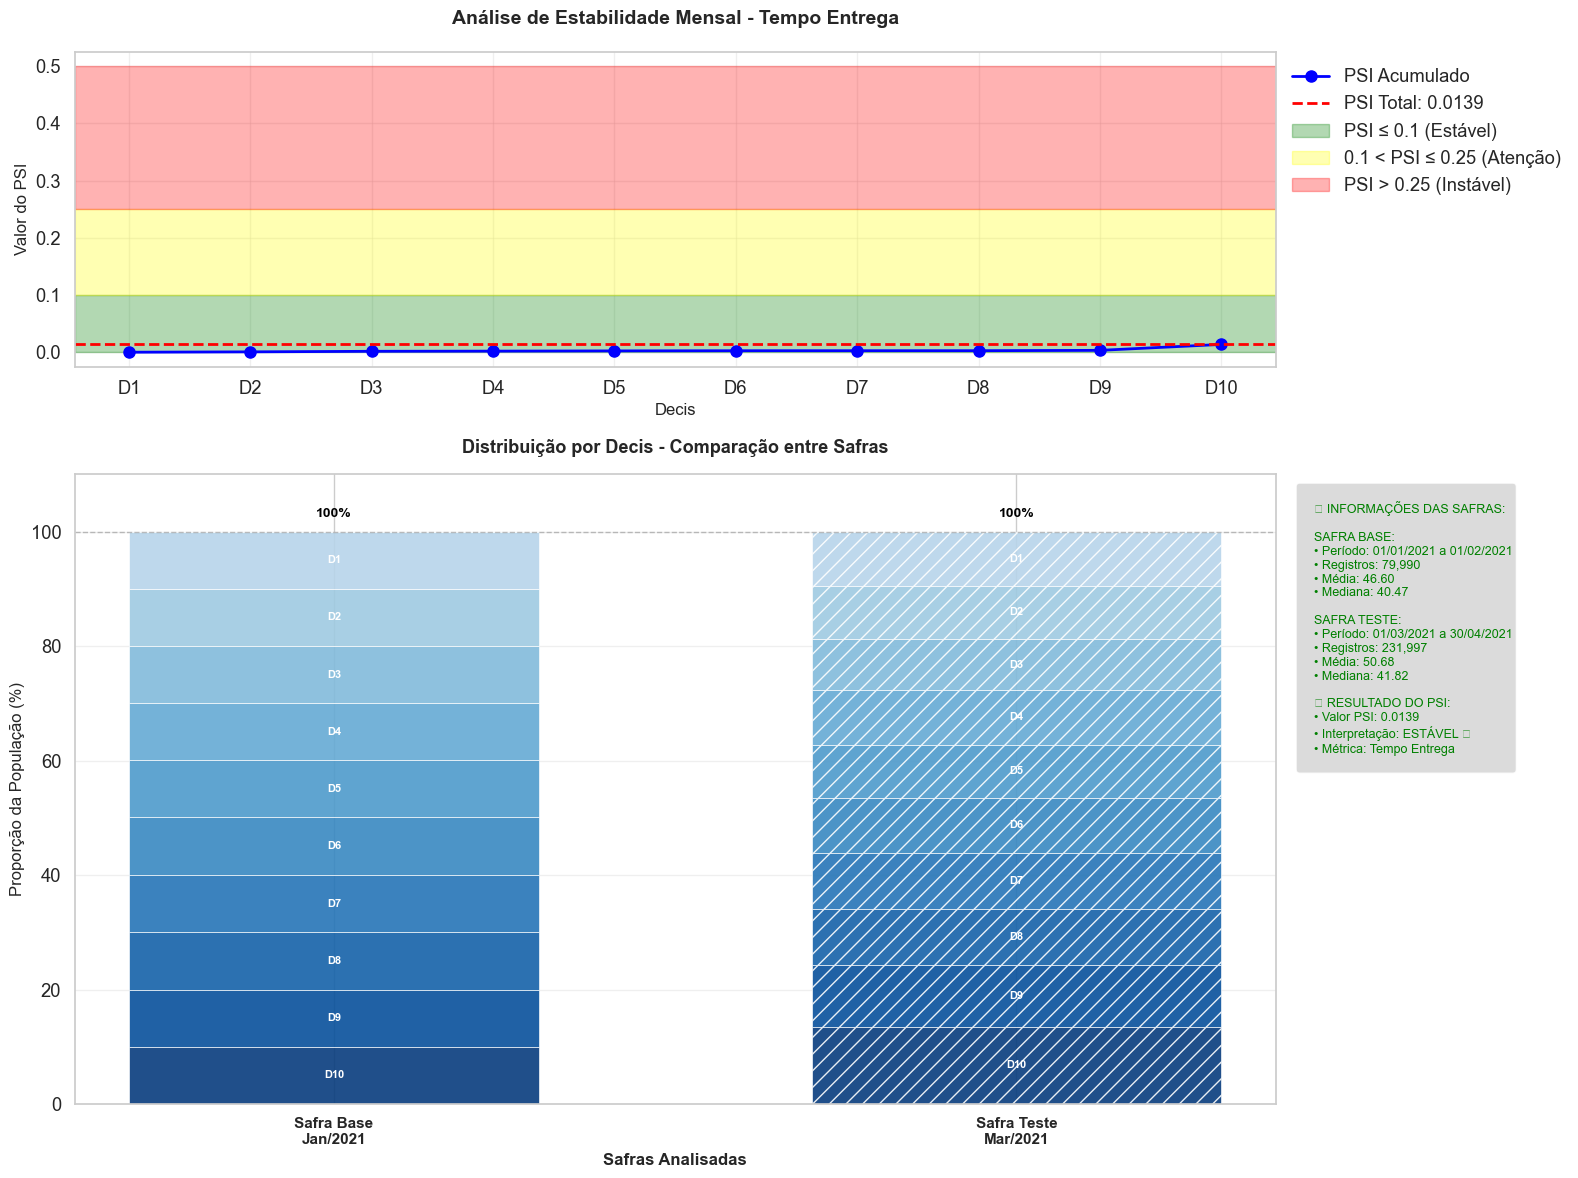


🎯 RESULTADO FINAL: PSI = 0.0139 - ESTÁVEL ✅

📋 DETALHAMENTO POR DECIL:
Decil  % Base     % Teste    Diferença    PSI Comp. 
------------------------------------------------------------
D1     9.98       9.50       -0.48        0.0002    
D2     10.02      9.23       -0.78        0.0006    
D3     9.98       9.02       -0.97        0.0010    
D4     9.98       9.45       -0.53        0.0003    
D5     9.99       9.36       -0.63        0.0004    
D6     10.05      9.52       -0.53        0.0003    
D7     9.98       9.76       -0.22        0.0000    
D8     10.02      9.88       -0.14        0.0000    
D9     9.99       10.79      0.79         0.0006    
D10    10.01      13.49      3.47         0.0103    


In [66]:
psi_valor, psi_df = calcular_psi_temporal(
    df=df_target,
    coluna_data='data_pedido',
    coluna_metricas='tempo_entrega',
    nome_metrica='Tempo Entrega',
    data_base_inicio='2021-01-01', 
    data_base_fim='2021-02-01',
    data_teste_inicio='2021-03-01',
    data_teste_fim='2021-04-30',
    tipo_analise='mensal'
)

# <font color='green' style='font-size: 30px;'> 2.2) Criação da Spine </font>
<hr style='border: 2px solid green;'>

> 1. Existem ID duplicados, como o ID Pagamento. As linhas sao todas iguais, mas o que muda é o ID e o valor em alguns casos, algo muito estranho. 

> 2. Além disso, o ID Entrega também está estranho, uma vez que aparentemente há mais entregas que pedidos 

> 3. Como a ideia será modelar o tempo de entrega, a chave primária do problema será o ID Pedido Entrega, que se refere aos pedidos, sendo assim, removeu-se duplicatas mantendo o ID Pedido Entrega como chave primária

In [67]:
print("🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:")

print(f"Quantidade de Registros: {df_target.shape[0]:,}")
print()
print(f"id_loja único: {df_target['id_loja'].nunique():,} - Identificador único da loja.")
print(f"id_canal único: {df_target['id_canal'].nunique():,} - Identificador único do canal de vendas.")
print(f"id_pedido_entrega único: {df_target['id_pedido_entrega'].nunique():,} - Identificador único do pedido de entrega.")
print(f"id_pagamento único: {df_target['id_pagamento'].nunique():,} - Identificador único do pagamento.")
print(f"id_entrega único: {df_target['id_entrega'].nunique():,} - Identificador único da entrega.")
print(f"id_entregador único: {df_target['id_entregador'].nunique():,} - Identificador único do entregador.")
print(f"id_hub único: {df_target['id_hub'].nunique():,} - Identificador único do hub.")

# Verificar se há múltiplos pedidos_entrega para mesma entrega
pedidos_por_entrega = df_target.groupby('id_entrega')['id_pedido_entrega'].nunique()
print(f"\nEntregas com múltiplos pedidos: {(pedidos_por_entrega > 1).sum()}")
print()

🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:
Quantidade de Registros: 395,770

id_loja único: 836 - Identificador único da loja.
id_canal único: 38 - Identificador único do canal de vendas.
id_pedido_entrega único: 327,765 - Identificador único do pedido de entrega.
id_pagamento único: 375,555 - Identificador único do pagamento.
id_entrega único: 345,393 - Identificador único da entrega.
id_entregador único: 4,530 - Identificador único do entregador.
id_hub único: 27 - Identificador único do hub.

Entregas com múltiplos pedidos: 0



- Explorando ID Pagamento 

In [68]:
df_target.loc[df_target['id_entrega'] == 3108733.00].drop_duplicates()

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub,data_pedido,dia_semana,hora_pedido,tempo_entrega
389731,56,5,90945484,FINISHED,42.40,6.90,12.00,23,15,17,4,2021,2021-04-17 23:15:28,2021-04-17 23:15:31,2021-04-17 23:34:05,2021-04-17 23:35:21,2021-04-17 23:35:22,2021-04-17 23:38:41,NaT,2021-04-17 23:50:24,1.25,3.32,18.62,1.27,4.60,11.72,34.92,FOOD PLACE,MARKETPLACE,5346921.00,39.30,0.59,ONLINE,PAID,3108733.00,NaN,827.00,DELIVERED,8,SUPSIO,FOOD,49.00,-22.92,-43.23,NaN,NaN,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.92,-43.23,2021-04-17,Saturday,23,34.88
389733,56,5,90945484,FINISHED,42.40,6.90,12.00,23,15,17,4,2021,2021-04-17 23:15:28,2021-04-17 23:15:31,2021-04-17 23:34:05,2021-04-17 23:35:21,2021-04-17 23:35:22,2021-04-17 23:38:41,NaT,2021-04-17 23:50:24,1.25,3.32,18.62,1.27,4.60,11.72,34.92,FOOD PLACE,MARKETPLACE,5346922.00,10.00,0.00,VOUCHER,PAID,3108733.00,NaN,827.00,DELIVERED,8,SUPSIO,FOOD,49.00,-22.92,-43.23,NaN,NaN,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.92,-43.23,2021-04-17,Saturday,23,34.88


- Definição da Spine 

In [69]:
# Primeiro, ordenar pelo valor_pagamento em ordem decrescente
# Assim, quando remover duplicatas, manterá o maior valor
df_sorted = df_target.sort_values('valor_pagamento', ascending=False).copy()

# Remover duplicatas mantendo a primeira ocorrência (que será a com maior valor_pagamento)
df_target_sem_duplicatas= df_sorted.drop_duplicates(subset='id_pedido_entrega', keep='first')

print(f"Linhas antes: {len(df_target)}")
print(f"Linhas depois: {len(df_target_sem_duplicatas)}")
print(f"Registros duplicados removidos: {len(df_target) - len(df_target_sem_duplicatas)}")

Linhas antes: 395770
Linhas depois: 327765
Registros duplicados removidos: 68005


In [70]:
print("🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:")

print(f"Quantidade de Registros: {df_target_sem_duplicatas.shape[0]:,}")
print()
print(f"id_loja único: {df_target_sem_duplicatas['id_loja'].nunique():,} - Identificador único da loja.")
print(f"id_canal único: {df_target_sem_duplicatas['id_canal'].nunique():,} - Identificador único do canal de vendas.")
print(f"id_pedido_entrega único: {df_target_sem_duplicatas['id_pedido_entrega'].nunique():,} - Identificador único do pedido de entrega.")
print(f"id_pagamento único: {df_target_sem_duplicatas['id_pagamento'].nunique():,} - Identificador único do pagamento.")
print(f"id_entrega único: {df_target_sem_duplicatas['id_entrega'].nunique():,} - Identificador único da entrega.")
print(f"id_entregador único: {df_target_sem_duplicatas['id_entregador'].nunique():,} - Identificador único do entregador.")
print(f"id_hub único: {df_target_sem_duplicatas['id_hub'].nunique():,} - Identificador único do hub.")

# Verificar se há múltiplos pedidos_entrega para mesma entrega
pedidos_por_entrega = df_target_sem_duplicatas.groupby('id_entrega')['id_pedido_entrega'].nunique()
print(f"\nEntregas com múltiplos pedidos: {(pedidos_por_entrega > 1).sum()}")
print()

🔍 ANÁLISE DE RELACIONAMENTOS ENTRE IDs:
Quantidade de Registros: 327,765

id_loja único: 836 - Identificador único da loja.
id_canal único: 38 - Identificador único do canal de vendas.
id_pedido_entrega único: 327,765 - Identificador único do pedido de entrega.
id_pagamento único: 327,510 - Identificador único do pagamento.
id_entrega único: 327,765 - Identificador único da entrega.
id_entregador único: 4,515 - Identificador único do entregador.
id_hub único: 27 - Identificador único do hub.

Entregas com múltiplos pedidos: 0



# <font color='green' style='font-size: 30px;'> 2.3) Criação das Amostras de Treino, Validação, Teste e Out-Of-Time </font>
<hr style='border: 2px solid green;'>

> 1. A fim de evitar Data Leakage, decidiu-se separar os dados em treino, validação, teste e oot

> 2. Para cenário, separou-se da seguinte maneira:

- Treino + Validação --> 80% dos IDs entre 202101 e 202103, sendo 90% para Treinamento do Modelo e 10% para Validação.
- Teste --> 20% dos IDs do treino
- OOT --> Todos os IDs para 202104
- '202101', --> TREINAMENTO/VALIDACAO/TESTE
- '202102', --> TREINAMENTO/VALIDACAO/TESTE
- '202103', --> TREINAMENTO/VALIDACAO/TESTE
- '202104', --> OOT

> 3. As distribuições da Variável Resposta são semelhantes no Treino, Validação, Teste e Out-of-Time



In [71]:
df_target_sem_duplicatas['safra'] = df_target_sem_duplicatas['momento_criacao_pedido'].dt.strftime('%Y%m')

amostra_treino_validacao = (
    df_target_sem_duplicatas
        .loc[~df_target_sem_duplicatas["safra"].isin(["202104"])]
        [["id_pedido_entrega"]]
        .drop_duplicates()
        .sample(frac = 0.8, random_state = 42, replace = False)
)

train = (
    amostra_treino_validacao.sample(frac = 0.9, random_state = 42, replace = False)
    [["id_pedido_entrega"]]
    .drop_duplicates()
) 

valid = (
    amostra_treino_validacao.loc[~amostra_treino_validacao["id_pedido_entrega"].isin(list(train["id_pedido_entrega"].unique()))]
    [["id_pedido_entrega"]]
    .drop_duplicates()
)

test = (
    df_target_sem_duplicatas
        .loc[
            (~df_target_sem_duplicatas["safra"].isin(["202104"])) & 
            (~df_target_sem_duplicatas["id_pedido_entrega"].isin(list(train["id_pedido_entrega"].unique()))) & 
            (~df_target_sem_duplicatas["id_pedido_entrega"].isin(list(valid["id_pedido_entrega"].unique())))
        ]
        [["id_pedido_entrega"]]
        .drop_duplicates()
)

oot = (
    df_target_sem_duplicatas
        .loc[
            (df_target_sem_duplicatas["safra"].isin(["202104"]))
        ]
        [["id_pedido_entrega"]]
        .drop_duplicates()
)

df_train = train.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_valid = valid.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_test = test.merge(df_target_sem_duplicatas.loc[~df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")
df_oot = oot.merge(df_target_sem_duplicatas.loc[df_target_sem_duplicatas["safra"].isin(["202104"])], on = "id_pedido_entrega", how = "left")

print(f"A quantidade de amostras no Treino (202101~202103) é: {df_train.shape[0]}")
print(f"A quantidade de amostras na Validação (202101~202103) é: {df_valid.shape[0]}")
print(f"A quantidade de amostras no Teste (202101~202103) é: {df_test.shape[0]}")
print(f"A quantidade de amostras no OOT (202104) é: {df_oot.shape[0]}")

amostras = [df_train, df_valid, df_test, df_oot]
tipo = ["Treino", "Validação", "Teste", "OOT"]

A quantidade de amostras no Treino (202101~202103) é: 167204
A quantidade de amostras na Validação (202101~202103) é: 18578
A quantidade de amostras no Teste (202101~202103) é: 46446
A quantidade de amostras no OOT (202104) é: 95537



📊 ANALISANDO DISTRIBUIÇÃO DE: tempo_entrega

1. Gerando histogramas individuais...


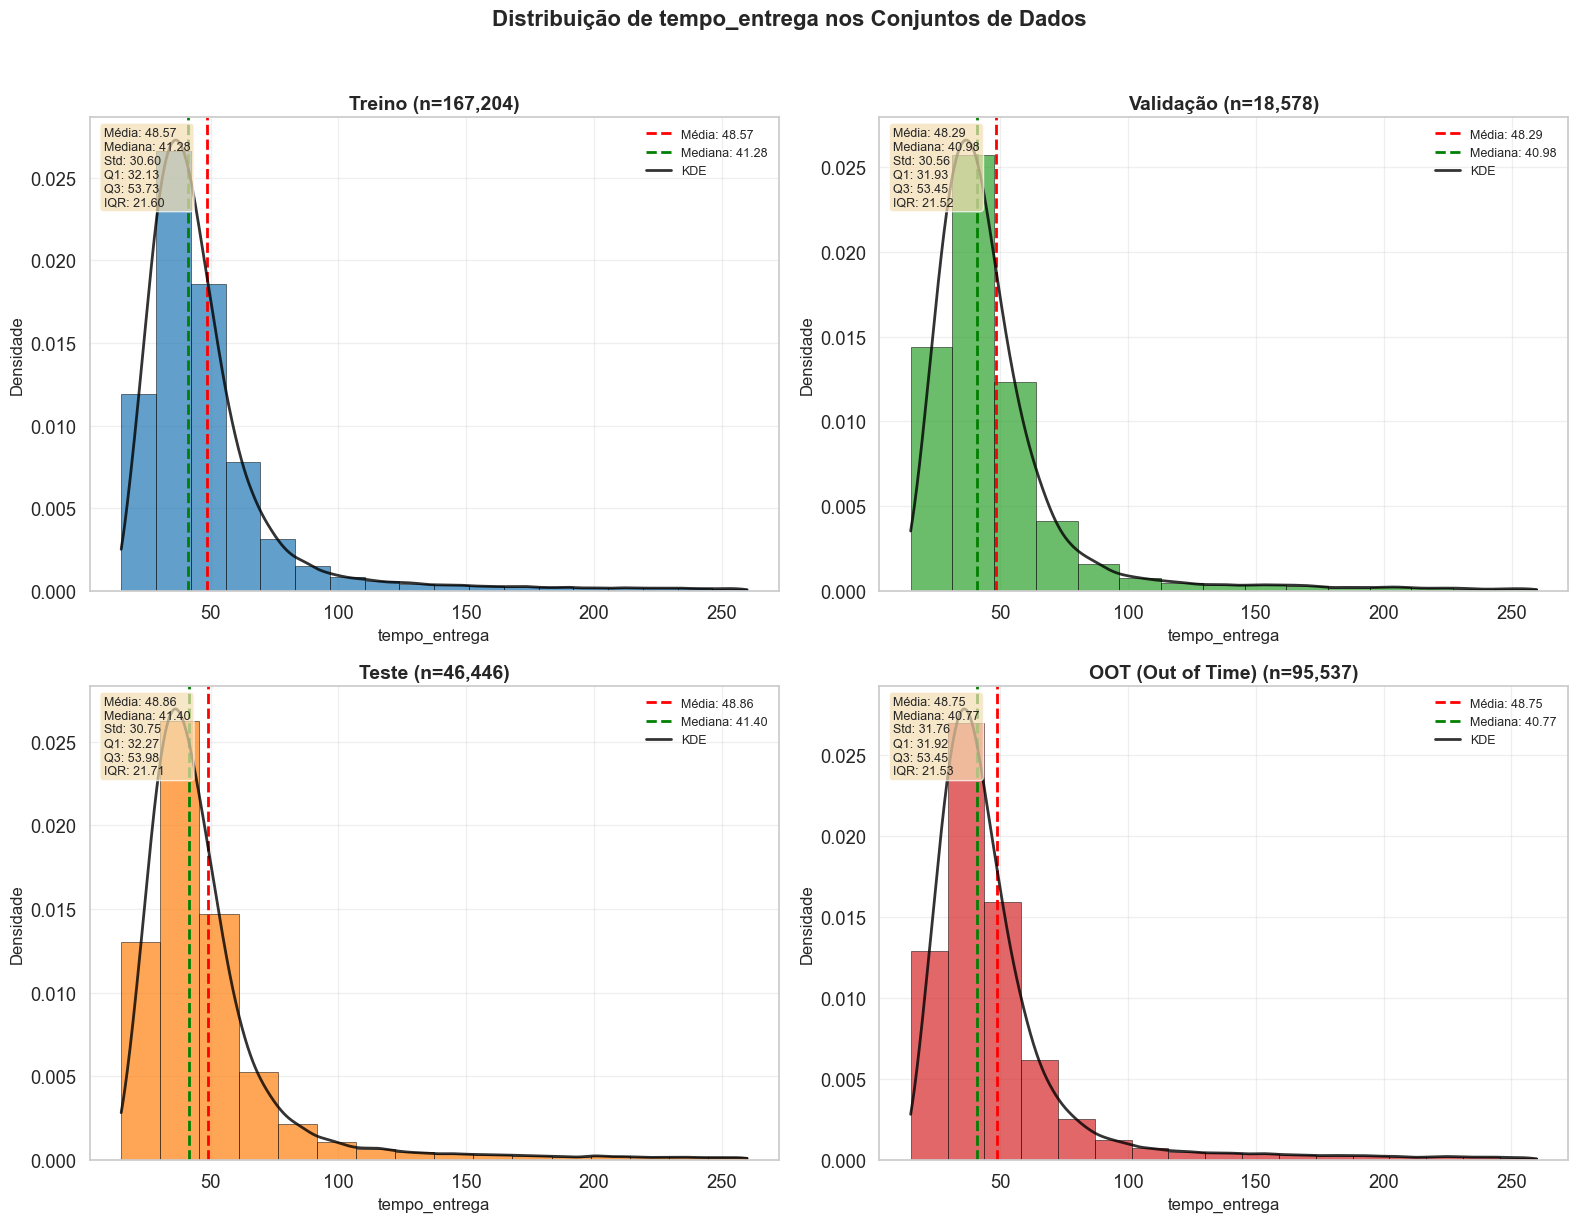


2. Gerando boxplot comparativo...


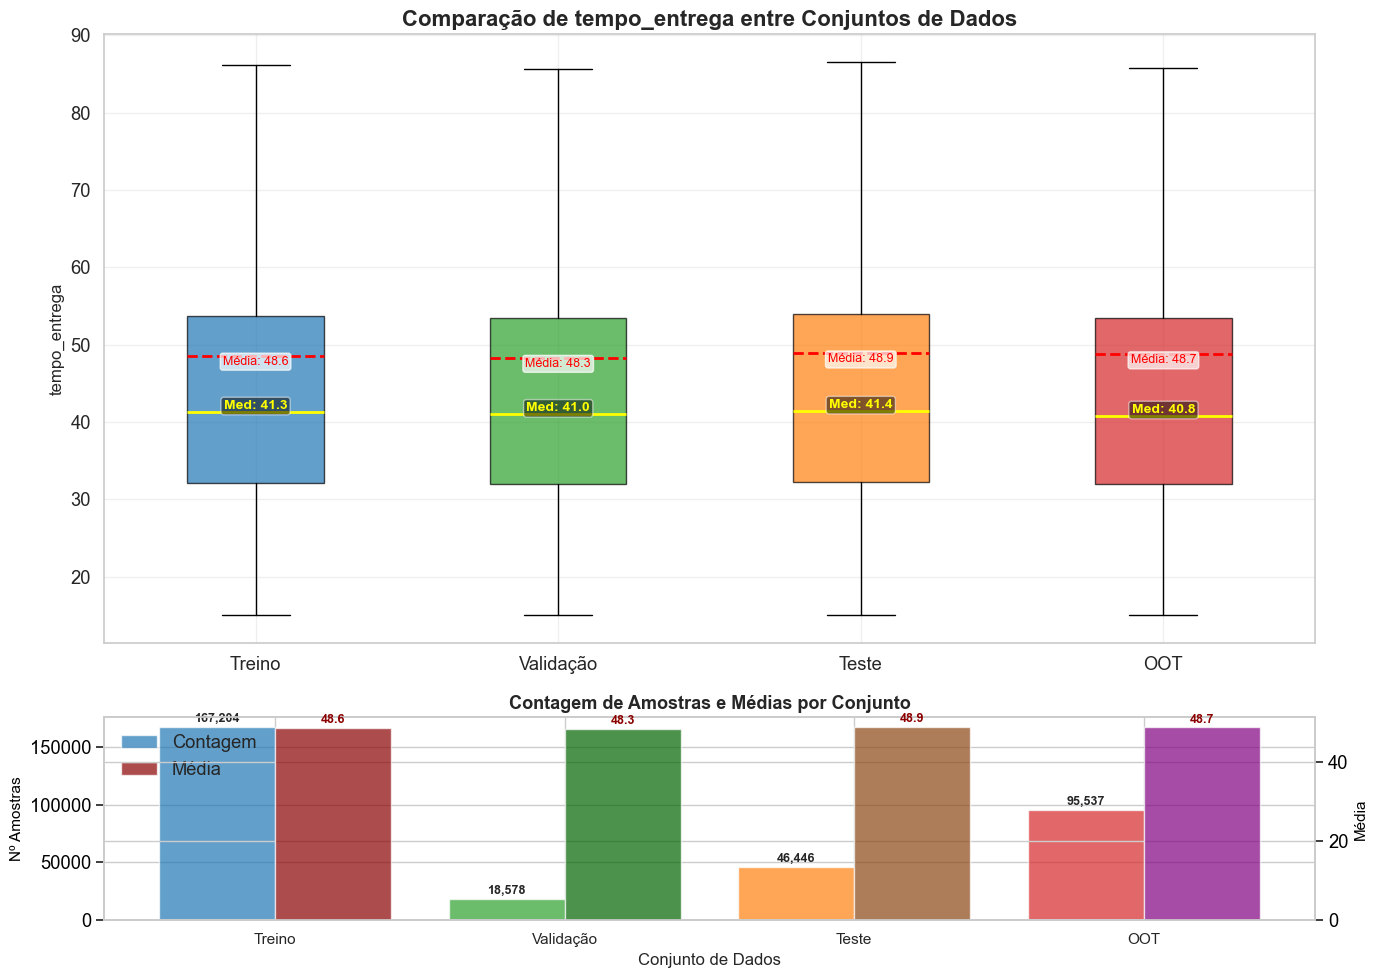


RESUMO ESTATÍSTICO - DISTRIBUIÇÃO DE TEMPO DE ENTREGA
 Conjunto Amostras Média Mediana   Std   Min    Max    Q1    Q3   IQR
   Treino  167,204 48.57   41.28 30.60 15.00 260.00 32.13 53.73 21.60
Validação   18,578 48.29   40.98 30.56 15.02 259.82 31.93 53.45 21.52
    Teste   46,446 48.86   41.40 30.75 15.00 259.98 32.27 53.98 21.71
      OOT   95,537 48.75   40.77 31.76 15.00 259.87 31.92 53.45 21.53

3. Gerando gráfico de densidade comparativo...


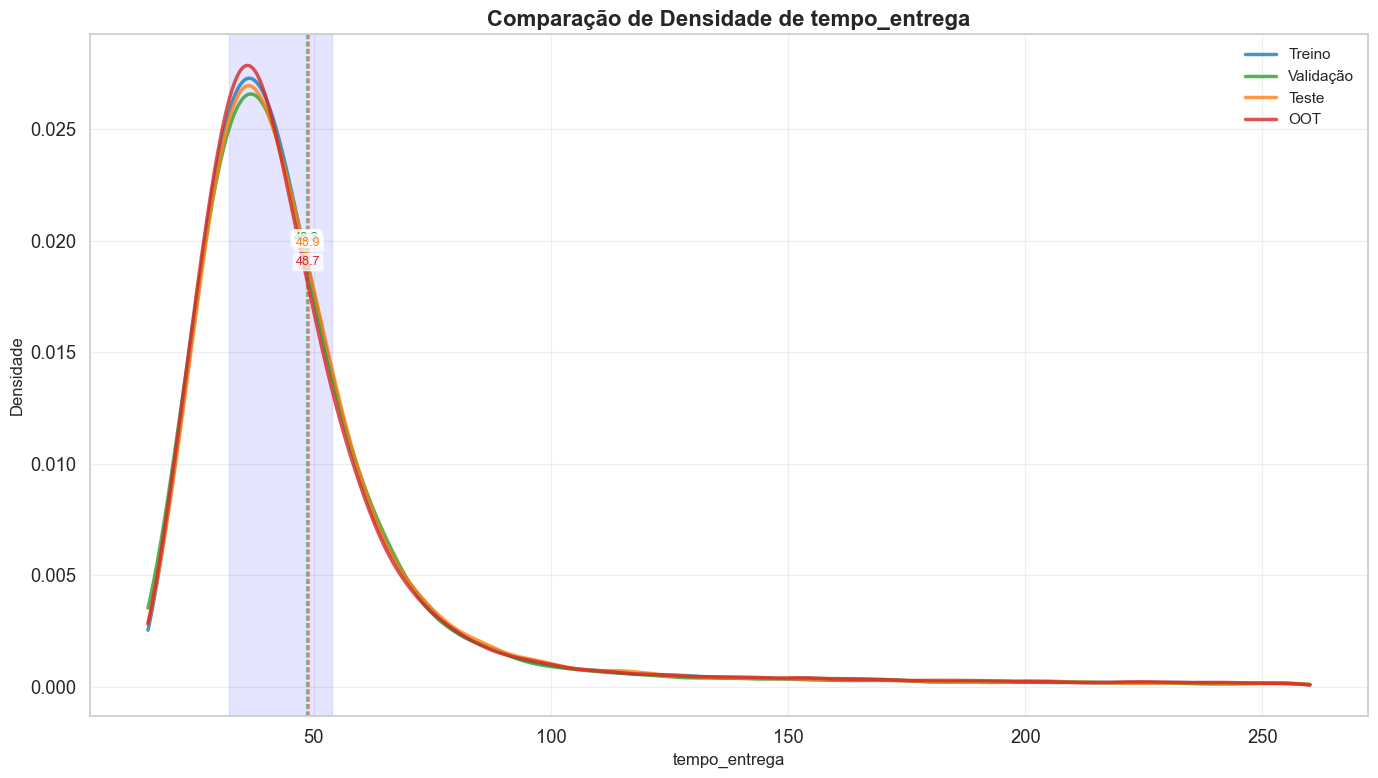

In [72]:
stats = visualize_all_comparisons(df_train, df_valid, df_test, df_oot, 'tempo_entrega')

In [73]:
df_train.to_parquet('../Modelo_Delivery/data/df_train.parquet', index=False)
df_valid.to_parquet('../Modelo_Delivery/data/df_valid.parquet', index=False)
df_test.to_parquet('../Modelo_Delivery/data/df_test.parquet', index=False)
df_oot.to_parquet('../Modelo_Delivery/data/df_oot.parquet', index=False)

# <font color='orange' style='font-size: 40px;'> 3. Criação de Features </font>
<hr style='border: 2px solid orange;'>

> **Objetivo**: Esta Seção consolida propostas de features conceitualmente fortes e de implementação simples, organizadas em quatro eixos: **Features Convencionais**, **Estatística Espacial**, **Séries Temporais** e **Grafos**.

> **Pontos de Observação**: Trata-se de um problema de Interpolação, ou seja, embora tenhamos a série histórica de pedidos diários, os pedidos são independentes. 



Quantidade de Registros: 327,765
Index(['flag_amostra', 'tempo_entrega', 'safra', 'data_pedido',
       'dia_criacao_pedido', 'dia_semana', 'hora_pedido',
       'momento_criacao_pedido', 'id_pedido_entrega', 'id_canal', 'id_loja',
       'id_hub', 'id_entregador', 'nome_canal', 'nome_loja', 'cidade_hub',
       'metodo_pagamento', 'fl_tipo_canal', 'fl_segmento_loja',
       'fl_modal_entregador', 'fl_tipo_entregador', 'valor_pedido',
       'taxa_entrega_cliente', 'distancia_entrega_metros', 'latitude_loja',
       'longitude_loja', 'latitude_hub', 'longitude_hub',
       'tempo_coleta_pedido', 'tempo_producao_pedido',
       'tempo_deslocamento_pedido', 'tempo_expedicao_pedido',
       'tempo_transito_pedido'],
      dtype='object')


,flag_amostra,tempo_entrega,safra,data_pedido,dia_criacao_pedido,dia_semana,hora_pedido,momento_criacao_pedido,id_pedido_entrega,id_canal,id_loja,id_hub,id_entregador,nome_canal,nome_loja,cidade_hub,metodo_pagamento,fl_tipo_canal,fl_segmento_loja,fl_modal_entregador,fl_tipo_entregador,valor_pedido,taxa_entrega_cliente,distancia_entrega_metros,latitude_loja,longitude_loja,latitude_hub,longitude_hub,tempo_coleta_pedido,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido
13684,treino,41.15,202101,2021-01-01,1,Friday,21,2021-01-01 21:24:17,68505583,5,8,3,15086.00,FOOD PLACE,RASMUR S,PORTO ALEGRE,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,30.00,9.90,3186.00,-30.04,-51.20,-30.04,-51.20,0.48,33.67,0.50,1.42,9.53
109797,treino,55.85,202101,2021-01-01,1,Friday,16,2021-01-01 16:34:42,68441526,5,149,8,319.00,FOOD PLACE,IUMPICA,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,FREELANCE,177.10,11.90,2107.00,-22.92,-43.23,-22.92,-43.23,1.48,17.93,1.77,6.48,32.20
50664,treino,75.37,202101,2021-01-01,1,Friday,21,2021-01-01 21:26:05,68506311,5,658,29,28165.00,FOOD PLACE,IUMPICA,SÃO PAULO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,FREELANCE,228.30,11.90,3645.00,-23.56,-46.56,-23.56,-46.56,0.88,25.30,4.93,12.93,37.27
38927,treino,39.02,202101,2021-01-01,1,Friday,15,2021-01-01 15:06:31,68418711,5,998,20,12893.00,FOOD PLACE,TRAZ LOURA RIRMAM,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,FREELANCE,69.00,9.90,3484.00,-23.00,-43.36,-23.00,-43.36,1.05,21.88,2.28,2.75,15.20
38933,treino,29.78,202101,2021-01-01,1,Friday,17,2021-01-01 17:09:32,68449304,5,149,8,28171.00,FOOD PLACE,IUMPICA,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,BIKER,FREELANCE,117.25,11.90,516.00,-22.92,-43.23,-22.92,-43.23,1.17,15.27,1.28,4.08,10.52


Existem 33 variáveis no Dataset
Existem 21 variáveis sem registros nulos no Dataset


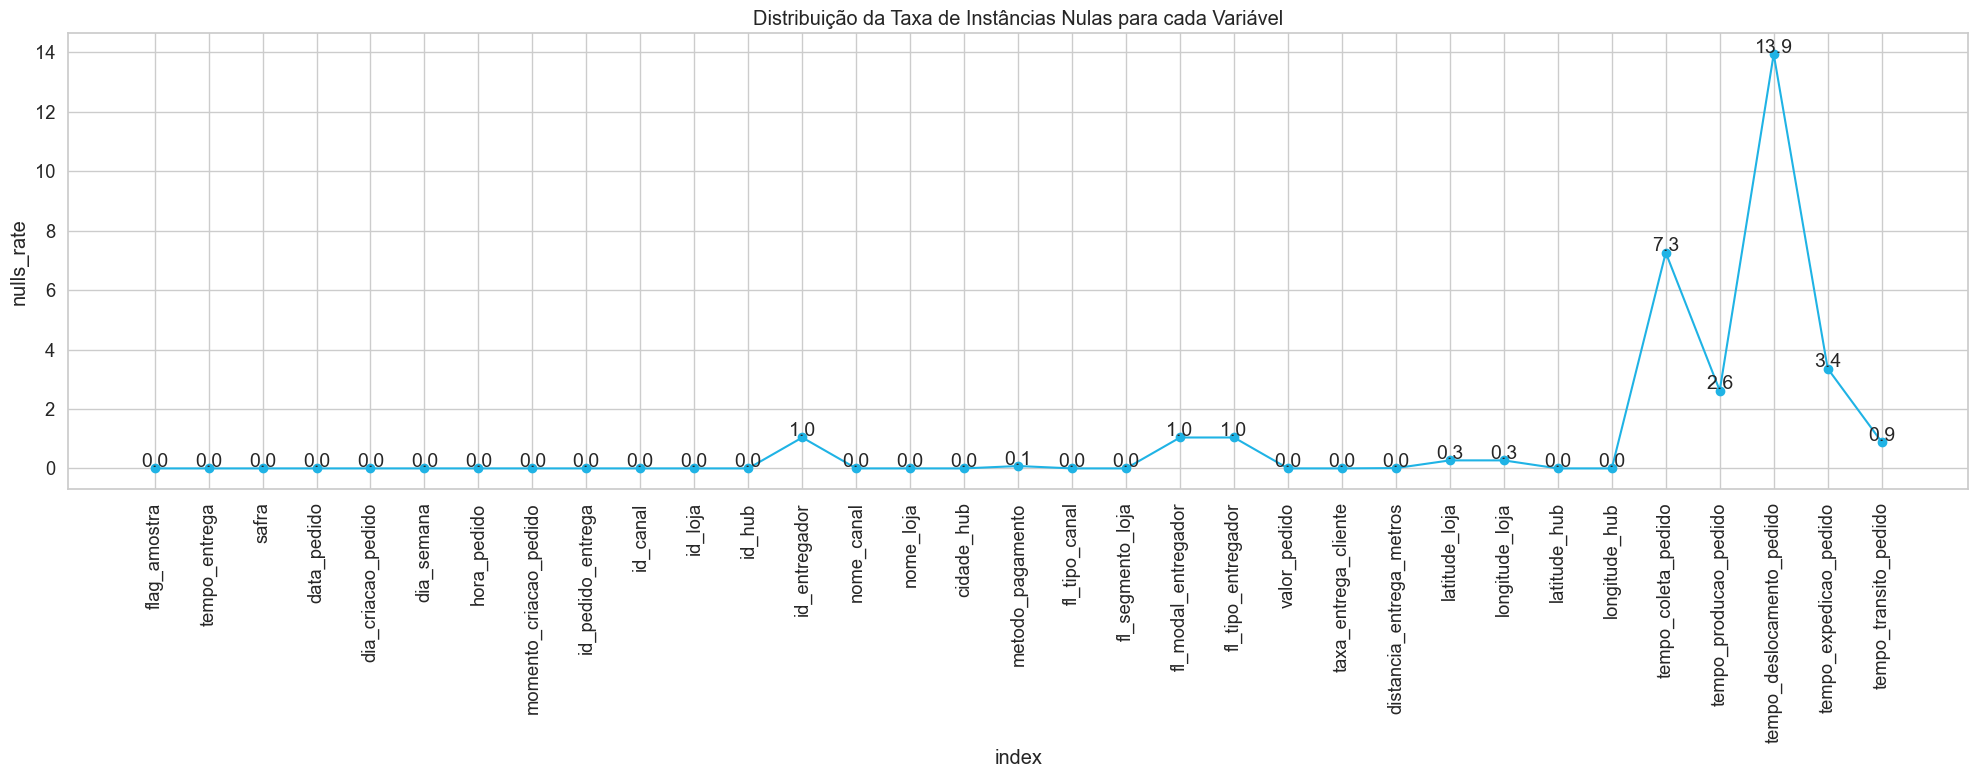

In [74]:
df_train = pd.read_parquet('../Modelo_Delivery/data/df_train.parquet').drop(['hora_criacao_pedido', 'minuto_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_pedido_pausado', 'tempo_ciclo_pedido', 'estado_hub'], axis = 1)
df_train['flag_amostra'] = 'treino'
df_valid = pd.read_parquet('../Modelo_Delivery/data/df_valid.parquet').drop(['hora_criacao_pedido', 'minuto_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_pedido_pausado', 'tempo_ciclo_pedido', 'estado_hub'], axis = 1)
df_valid['flag_amostra'] = 'validacao'
df_test = pd.read_parquet('../Modelo_Delivery/data/df_test.parquet').drop(['hora_criacao_pedido', 'minuto_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_pedido_pausado', 'tempo_ciclo_pedido', 'estado_hub'], axis = 1)
df_test['flag_amostra'] = 'teste'
df_oot = pd.read_parquet('../Modelo_Delivery/data/df_oot.parquet').drop(['hora_criacao_pedido', 'minuto_criacao_pedido',
       'mes_criacao_pedido', 'ano_criacao_pedido',
       'momento_aceite_pedido', 'momento_pedido_pronto',
       'momento_pedido_coletado', 'momento_pedido_expedicao',
       'momento_pedido_em_entrega', 'momento_pedido_entregue',
       'momento_pedido_finalizado', 'tempo_pedido_pausado', 'tempo_ciclo_pedido', 'estado_hub'], axis = 1)
df_oot['flag_amostra'] = 'oot'

df_train = df_train[['flag_amostra', 'tempo_entrega', # Target
 'safra', 'data_pedido', 'dia_criacao_pedido', 'dia_semana', 'hora_pedido', 'momento_criacao_pedido', # Datas para Referência Temporal
 'id_pedido_entrega', 'id_canal', 'id_loja', 'id_hub', 'id_entregador', # IDs
 'nome_canal', 'nome_loja', 'cidade_hub', # Categorias de Canais, Loja e Hub
 'metodo_pagamento', # Categorias de Pagamento
 'tipo_canal', 'segmento_loja', 'modal_entregador', 'tipo_entregador', # Flags Binárias
 'valor_pedido', 'taxa_entrega_cliente', # Valores Monetários
 'distancia_entrega_metros', 'latitude_loja', 'longitude_loja', 'latitude_hub', 'longitude_hub', # Valores Geográficos
 'tempo_coleta_pedido', 'tempo_producao_pedido', 'tempo_deslocamento_pedido', 'tempo_expedicao_pedido', 'tempo_transito_pedido' # Valores Temporais  
]].sort_values(by = 'data_pedido', ascending = True).rename({'tipo_canal':'fl_tipo_canal', 'segmento_loja':'fl_segmento_loja', 'modal_entregador':'fl_modal_entregador', 'tipo_entregador':'fl_tipo_entregador'}, axis = 1)

df_valid = df_valid[['flag_amostra', 'tempo_entrega', # Target
 'safra', 'data_pedido', 'dia_criacao_pedido','dia_semana', 'hora_pedido', 'momento_criacao_pedido', # Datas para Referência Temporal
 'id_pedido_entrega', 'id_canal', 'id_loja', 'id_hub', 'id_entregador', # IDs
 'nome_canal', 'nome_loja', 'cidade_hub', # Categorias de Canais, Loja e Hub
 'metodo_pagamento', # Categorias de Pagamento
 'tipo_canal', 'segmento_loja', 'modal_entregador', 'tipo_entregador', # Flags Binárias
 'valor_pedido', 'taxa_entrega_cliente', # Valores Monetários
 'distancia_entrega_metros', 'latitude_loja', 'longitude_loja', 'latitude_hub', 'longitude_hub', # Valores Geográficos
 'tempo_coleta_pedido', 'tempo_producao_pedido', 'tempo_deslocamento_pedido', 'tempo_expedicao_pedido', 'tempo_transito_pedido' # Valores Temporais  
]].sort_values(by = 'data_pedido', ascending = True).rename({'tipo_canal':'fl_tipo_canal', 'segmento_loja':'fl_segmento_loja', 'modal_entregador':'fl_modal_entregador', 'tipo_entregador':'fl_tipo_entregador'}, axis = 1)

df_test = df_test[['flag_amostra', 'tempo_entrega', # Target
 'safra', 'data_pedido', 'dia_criacao_pedido', 'dia_semana', 'hora_pedido', 'momento_criacao_pedido', # Datas para Referência Temporal
 'id_pedido_entrega', 'id_canal', 'id_loja', 'id_hub', 'id_entregador', # IDs
 'nome_canal', 'nome_loja', 'cidade_hub', # Categorias de Canais, Loja e Hub
 'metodo_pagamento', # Categorias de Pagamento
 'tipo_canal', 'segmento_loja', 'modal_entregador', 'tipo_entregador', # Flags Binárias
 'valor_pedido', 'taxa_entrega_cliente', # Valores Monetários
 'distancia_entrega_metros', 'latitude_loja', 'longitude_loja', 'latitude_hub', 'longitude_hub', # Valores Geográficos
 'tempo_coleta_pedido', 'tempo_producao_pedido', 'tempo_deslocamento_pedido', 'tempo_expedicao_pedido', 'tempo_transito_pedido' # Valores Temporais  
]].sort_values(by = 'data_pedido', ascending = True).rename({'tipo_canal':'fl_tipo_canal', 'segmento_loja':'fl_segmento_loja', 'modal_entregador':'fl_modal_entregador', 'tipo_entregador':'fl_tipo_entregador'}, axis = 1)

df_oot = df_oot[['flag_amostra', 'tempo_entrega', # Target
 'safra', 'data_pedido', 'dia_criacao_pedido','dia_semana', 'hora_pedido', 'momento_criacao_pedido', # Datas para Referência Temporal
 'id_pedido_entrega', 'id_canal', 'id_loja', 'id_hub', 'id_entregador', # IDs
 'nome_canal', 'nome_loja', 'cidade_hub', # Categorias de Canais, Loja e Hub
 'metodo_pagamento', # Categorias de Pagamento
 'tipo_canal', 'segmento_loja', 'modal_entregador', 'tipo_entregador', # Flags Binárias
 'valor_pedido', 'taxa_entrega_cliente', # Valores Monetários
 'distancia_entrega_metros', 'latitude_loja', 'longitude_loja', 'latitude_hub', 'longitude_hub', # Valores Geográficos
 'tempo_coleta_pedido', 'tempo_producao_pedido', 'tempo_deslocamento_pedido', 'tempo_expedicao_pedido', 'tempo_transito_pedido' # Valores Temporais  
]].sort_values(by = 'data_pedido', ascending = True).rename({'tipo_canal':'fl_tipo_canal', 'segmento_loja':'fl_segmento_loja', 'modal_entregador':'fl_modal_entregador', 'tipo_entregador':'fl_tipo_entregador'}, axis = 1)

df_features = pd.concat([df_train, df_valid, df_test, df_oot]).copy()
print(f"Quantidade de Registros: {df_features.shape[0]:,}")
print(df_features.columns)
display(df_features.head())

# Análise de Nulos
df_nulls = (
    pd.DataFrame(
        df_features
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_features.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

# <font color='green' style='font-size: 30px;'> 3.1) Criação das Features </font>
<hr style='border: 2px solid green;'>

In [75]:
df_features = df_features.sort_values(['id_entregador', 'momento_criacao_pedido'])
df_features.head(10)

,flag_amostra,tempo_entrega,safra,data_pedido,dia_criacao_pedido,dia_semana,hora_pedido,momento_criacao_pedido,id_pedido_entrega,id_canal,id_loja,id_hub,id_entregador,nome_canal,nome_loja,cidade_hub,metodo_pagamento,fl_tipo_canal,fl_segmento_loja,fl_modal_entregador,fl_tipo_entregador,valor_pedido,taxa_entrega_cliente,distancia_entrega_metros,latitude_loja,longitude_loja,latitude_hub,longitude_hub,tempo_coleta_pedido,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido
87801,treino,56.53,202101,2021-01-21,21,Thursday,19,2021-01-21 19:28:36,72836185,5,294,13,133.00,FOOD PLACE,PAPA SUCIS,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,162.90,0.00,2188.00,-22.89,-43.28,-22.89,-43.28,0.15,20.22,3.95,6.15,30.38
24019,treino,35.25,202101,2021-01-21,21,Thursday,19,2021-01-21 19:35:36,72836906,5,294,13,133.00,FOOD PLACE,PAPA SUCIS,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,39.90,0.00,1296.00,-22.89,-43.28,-22.89,-43.28,0.72,13.85,3.40,12.07,10.67
134604,treino,35.20,202101,2021-01-21,21,Thursday,20,2021-01-21 20:40:26,72845357,5,1153,13,133.00,FOOD PLACE,RIMAI EU TRAPRISCI,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,37.80,0.00,2402.00,-22.89,-43.28,-22.89,-43.28,3.63,11.28,4.47,8.72,15.35
71352,treino,52.10,202101,2021-01-23,23,Saturday,0,2021-01-23 00:23:42,73101555,5,345,13,133.00,FOOD PLACE,ZIM ME MUMEUR,RIO DE JANEIRO,DEBIT,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,135.10,9.90,1871.00,-22.89,-43.28,-22.89,-43.28,2.43,22.83,4.03,4.88,24.52
353,treino,27.92,202101,2021-01-23,23,Saturday,21,2021-01-23 21:11:40,73260366,5,294,13,133.00,FOOD PLACE,PAPA SUCIS,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,37.30,6.90,1309.00,-22.89,-43.28,-22.89,-43.28,1.03,11.43,3.35,7.22,9.62
15999,treino,31.15,202101,2021-01-26,26,Tuesday,0,2021-01-26 00:32:03,73696911,5,236,13,133.00,FOOD PLACE,IUMPICA,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,68.50,11.90,2484.00,-22.89,-43.28,-22.89,-43.28,3.23,13.52,7.63,8.37,9.40
124709,treino,42.78,202101,2021-01-29,29,Friday,21,2021-01-29 21:23:47,74453929,5,3627,13,133.00,FOOD PLACE,O GARI!,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,154.70,0.00,3708.00,-22.89,-43.28,-22.89,-43.28,1.18,16.28,9.13,12.12,16.80
94381,treino,24.65,202101,2021-01-29,29,Friday,22,2021-01-29 22:27:49,74477507,5,294,13,133.00,FOOD PLACE,PAPA SUCIS,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,28.00,6.90,1378.00,-22.89,-43.28,-22.89,-43.28,1.52,6.35,5.22,6.45,12.30
6316,treino,57.83,202101,2021-01-29,29,Friday,22,2021-01-29 22:32:58,74479649,5,236,13,133.00,FOOD PLACE,IUMPICA,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,177.90,11.90,3142.00,-22.89,-43.28,-22.89,-43.28,1.40,33.53,10.00,13.70,11.28
151762,treino,65.52,202101,2021-01-29,29,Friday,22,2021-01-29 22:53:29,74487236,5,236,13,133.00,FOOD PLACE,IUMPICA,RIO DE JANEIRO,ONLINE,MARKETPLACE,FOOD,MOTOBOY,LOGISTIC OPERATOR,108.40,11.90,2065.00,-22.89,-43.28,-22.89,-43.28,0.22,40.23,12.90,15.18,10.45


#### **1. Variáveis Financeiras** (FEITO)

- Valor do Pedido
- Taxa de Entrega
- Variável que calcula a Média do Valor dos últimos 7 pedidos da loja
- Variável que calcula a Taxa de Entrega dos últimos 7 pedidos da loja
- Variável que calcula o Valor do Pedido em relaçao ao Valor Médio da Loja para identificar pedidos complexos
- Variável que calcula a Taxa de Entrega em relaçao a Taxa Média da Loja para identificar pedidos complexos

In [76]:
########### Variáveis Financeiras ###########
df_features = df_features.copy()
df_features = df_features.sort_values(['id_loja', 'momento_criacao_pedido'])

grupo_var = (
    df_features
    .groupby('id_loja')['valor_pedido']
    .shift(1)  # evita leakage
    .rolling(window=7,min_periods=1)
)
df_features[f"valor_pedido_loja_mm7"] = grupo_var.mean()
df_features[f"escore_complexidade_pedido_valor"] = df_features[f"valor_pedido"]/df_features['valor_pedido_loja_mm7']

grupo_var = (
    df_features
    .groupby('id_loja')['taxa_entrega_cliente']
    .shift(1)  # evita leakage
    .rolling(window=7,min_periods=1)
)

df_features[f"taxa_entrega_cliente_loja_mm7"] = grupo_var.mean()
df_features[f"escore_complexidade_pedido_taxa"] = df_features[f"taxa_entrega_cliente"]/df_features['taxa_entrega_cliente_loja_mm7']

#### **2. Indicadores Temporais** (FEITO)
- Hora do Dia
- Variável Categórica que indica se estamos no início ou final do mês
- Variável Categórica que indica se estamos no final de semana ou não

In [77]:
########### Indicadores Temporais ###########
df_features['fl_primeira_quinzena'] = np.where(df_features['dia_criacao_pedido'] <= 15, 1, 0)
df_features['fl_final_de_semana'] = np.where(df_features['dia_semana'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

#### **3. Indicadores de Segmento** (FEITO)
- Variável Categórica que indica se o canal é marketplace ou canal próprio
- Variável Categórica que indica se a loja é de comida ou de bens de consumo
- Variável Categórica que indica se o pedido é entregue por um entregador de moto ou bike
- Variável Categórica que indica se o entregador é freelancer ou é um operador logístico contratado


In [78]:
########### Indicadores de Segmento ###########
df_features['fl_tipo_canal'] = np.where(df_features['fl_tipo_canal'] == 'MARKETPLACE', 1, np.where(df_features['fl_tipo_canal'] == 'OWN CHANNEL', 0, np.nan)) 
df_features['fl_segmento_loja'] = np.where(df_features['fl_segmento_loja'] == 'FOOD', 1, np.where(df_features['fl_segmento_loja'] == 'GOOD', 0, np.nan)) 
df_features['fl_modal_entregador'] = np.where(df_features['fl_modal_entregador'] == 'MOTOBOY', 1, np.where(df_features['fl_modal_entregador'] == 'BIKER', 0, np.nan)) 
df_features['fl_tipo_entregador'] = np.where(df_features['fl_tipo_entregador'] == 'FREELANCE', 1, np.where(df_features['fl_tipo_entregador'] == 'LOGISTIC OPERATOR', 0, np.nan))

#### **4. Variáveis de Eficiência** (FEITO)
- Variável que calcula o Tempo Médio de Entrega dos últimos 7 pedidos
- Variável que calcula o tempo médio de producao dos últimos 7 pedidos da Loja
- Variável que calcula a variabilidade média de producao dos últimos 7 pedidos da Loja
- Variável que calcula a velocidade média do tempo de trânsito do entregador dos últimos 7 pedidos
- Variável que calcula a variabilidade média do tempo de trânsito do entregador dos últimos 7 pedidos
- Variável que calcula a média de entregas por hora de cada loja
- Variável que calcula a média de entregas por dia de cada loja
- Variável que calcula a média de entregas por hora de cada entregador
- Variável que calcula a média de entregas por dia de cada entregador
- Variável que calcula a desvio padrão de entregas por hora de cada loja
- Variável que calcula a desvio padrão de entregas por dia de cada loja
- Variável que calcula a desvio padrão de entregas por hora de cada entregador
- Variável que calcula a desvio padrão de entregas por dia de cada entregador
- Variável que calcula a média de entregas da hora em relação a media global da loja 
- Variável que calcula a média de entregas da hora em relação a media global do entregador

In [79]:
########### Variáveis de Eficiência ###########
df_features = df_features.copy()
df_features = df_features.sort_values(['id_loja', 'momento_criacao_pedido'])
df_features['tempo_producao_pedido_lag1'] = df_features.groupby('id_loja')['tempo_producao_pedido'].shift(1)
df_features['tempo_entrega_lag1'] = df_features.groupby('id_loja')['tempo_entrega'].shift(1)

grupo_var = (
    df_features
    .groupby('id_loja')['tempo_producao_pedido_lag1']
    .shift(1)  # evita leakage
    .rolling(window=7,min_periods=1)
)
df_features[f"tempo_producao_pedido_loja_mm7"] = grupo_var.mean()
df_features[f"variabilidade_producao_pedido_loja_mm7"] = grupo_var.std()

grupo_var = (
    df_features
    .groupby('id_loja')['tempo_entrega_lag1']
    .shift(1)  # evita leakage
    .rolling(window=7,min_periods=1)
)
df_features[f"tempo_entrega_loja_mm7"] = grupo_var.mean()
df_features[f"variabilidade_entrega_loja_mm7"] = grupo_var.std()

df_features = df_features.sort_values(['id_entregador', 'momento_criacao_pedido'])
velocidade_lag = (df_features['distancia_entrega_metros'] / df_features['tempo_transito_pedido']).groupby(df_features['id_entregador']).shift(1)

df_features['velocidade_de_entrega_do_entregador_mm7'] = (
    velocidade_lag
    .groupby(df_features['id_entregador'])
    .transform(lambda x: x.rolling(7, min_periods=1).mean())
)

df_features['eficiencia_entrega_do_entregador_mm7'] = (
    velocidade_lag
    .groupby(df_features['id_entregador'])
    .transform(lambda x: x.rolling(7, min_periods=1).std())
)


df_features = df_features.sort_values(['id_loja', 'hora_pedido', 'data_pedido', 'momento_criacao_pedido'])
df_diario = (
    df_features
    .groupby(['id_loja', 'hora_pedido', 'data_pedido'])
    .size()
    .reset_index(name='qtd_pedidos_hora_dia')
)
df_diario = df_diario.sort_values(['id_loja', 'hora_pedido', 'data_pedido'])

grupo_var = (
    df_diario
    .groupby(['id_loja', 'hora_pedido'])['qtd_pedidos_hora_dia']
    .shift(1)  # evita leakage
    .rolling(window=7, min_periods=3)
)

df_diario['media_entregas_loja_hora'] = grupo_var.mean()
df_diario['std_entregas_loja_hora'] = grupo_var.std()

grupo_loja = (
    df_diario
    .groupby('id_loja')['qtd_pedidos_hora_dia']
    .shift(1)
    .rolling(window=7, min_periods=3)
)

df_diario['media_entregas_loja'] = grupo_loja.mean()
df_diario['intensidade_horaria_loja'] = df_diario['media_entregas_loja_hora'] /df_diario['media_entregas_loja']

df_features = df_features.merge(
    df_diario[
        [
            'id_loja',
            'hora_pedido',
            'data_pedido',
            'media_entregas_loja',
            'media_entregas_loja_hora',
            'std_entregas_loja_hora',
            'intensidade_horaria_loja'
        ]
    ],
    on=['id_loja', 'hora_pedido', 'data_pedido'],
    how='left'
)
df_features = df_features.sort_values(['id_entregador', 'hora_pedido', 'data_pedido', 'momento_criacao_pedido'])
df_diario = (
    df_features
    .groupby(['id_entregador', 'hora_pedido', 'data_pedido'])
    .size()
    .reset_index(name='qtd_pedidos_hora_dia')
)
df_diario = df_diario.sort_values(['id_entregador', 'hora_pedido', 'data_pedido'])

grupo_var = (
    df_diario
    .groupby(['id_entregador', 'hora_pedido'])['qtd_pedidos_hora_dia']
    .shift(1)  # evita leakage
    .rolling(window=7, min_periods=3)
)

df_diario['media_entregas_entregador_hora'] = grupo_var.mean()
df_diario['std_entregas_entregador_hora'] = grupo_var.std()

grupo_entregador = (
    df_diario
    .groupby('id_entregador')['qtd_pedidos_hora_dia']
    .shift(1)
    .rolling(window=7, min_periods=3)
)

df_diario['media_entregas_entregador'] = grupo_entregador.mean()
df_diario['intensidade_horaria_entregador'] = df_diario['media_entregas_entregador_hora'] /df_diario['media_entregas_entregador']

df_features = df_features.merge(
    df_diario[
        [
            'id_entregador',
            'hora_pedido',
            'data_pedido',
            'media_entregas_entregador_hora',
            'std_entregas_entregador_hora',
            'intensidade_horaria_entregador'
        ]
    ],
    on=['id_entregador', 'hora_pedido', 'data_pedido'],
    how='left'
)

#### **5. Variáveis de Alta Demanda** 
- Quantidade de pedidos por loja nas últimas 1 hora, últimas 2 horas, últimas 3 horas
- Quantidade de pedidos por hub nas últimas 1 hora, últimas 2 horas, últimas 3 horas
- Razão entre pedidos da loja na última 1h e a média histórica da loja
- Razão entre pedidos da loja na última 1h e a média daquele horário

In [80]:
########### Variáveis de Alta Demanda ###########
df_features['momento_criacao_pedido'] = pd.to_datetime(df_features['momento_criacao_pedido'])
df_features = df_features.sort_values(['id_loja', 'momento_criacao_pedido'])
df_features = df_features.set_index('momento_criacao_pedido')
df_features['qtd_pedidos_loja_ultima_1h'] = (
    df_features
    .groupby('id_loja')['id_pedido_entrega']
    .rolling('1h')
    .count()
    .shift(1)
    .reset_index(level=0, drop=True)
)
df_features['qtd_pedidos_loja_ultima_2h'] = (
    df_features
    .groupby('id_loja')['id_pedido_entrega']
    .rolling('2h')
    .count()
    .shift(1)
    .reset_index(level=0, drop=True)
)
df_features['qtd_pedidos_loja_ultima_3h'] = (
    df_features
    .groupby('id_loja')['id_pedido_entrega']
    .rolling('2h')
    .count()
    .shift(1)
    .reset_index(level=0, drop=True)
)
df_features = df_features.reset_index()

df_features = df_features.sort_values(['id_hub', 'momento_criacao_pedido'])
df_features = df_features.set_index('momento_criacao_pedido')
df_features['qtd_pedidos_hub_ultima_1h'] = (
    df_features
    .groupby('id_hub')['id_pedido_entrega']
    .rolling('1h')
    .count()
    .shift(1)
    .reset_index(level=0, drop=True)
)
df_features['qtd_pedidos_hub_ultima_2h'] = (
    df_features
    .groupby('id_hub')['id_pedido_entrega']
    .rolling('2h')
    .count()
    .shift(1)
    .reset_index(level=0, drop=True)
)
df_features['qtd_pedidos_hub_ultima_3h'] = (
    df_features
    .groupby('id_hub')['id_pedido_entrega']
    .rolling('3h')
    .count()
    .shift(1)
    .reset_index(level=0, drop=True)
)
df_features = df_features.reset_index()

df_features['intensidade_pedidos_loja_1h'] = df_features['qtd_pedidos_loja_ultima_1h']/df_features['media_entregas_loja']
df_features['intensidade_pedidos_loja_1h_vs_horario'] = df_features['qtd_pedidos_loja_ultima_1h']/df_features['media_entregas_loja_hora']

#### **6. Variáveis de Estatística Espacial**
- Distância
- Distância em linha reta entre a Loja e Hub. A ideia é transformar uma distância curvada devido à superfície esférica da reta em distância em linha reta através de Lat/Long
- Razão entre a distância em linha reta e a distância real percorrida, ou seja, a Tortuosidade do trajeto --> Quanto mais próxima a 1, melhor
- Diferença da distância entre o pedido anterior e o pedido atual (Distância do pedido anterior para o pedido atual)
- Assimetria da distância do pedido em relação à distância média das entregas da Loja (Quantidade de Desvios Padrões de diferença da média)
- Assimetria da distância do pedido em relação à distância média das entregas do Hub (Quantidade de Desvios Padrões de diferença da média)

In [81]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # raio da Terra em metros
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = (
        np.sin(dlat / 2) ** 2 +
        np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    )

    return 2 * R * np.arcsin(np.sqrt(a))

df_features['distancia_reta_loja_hub_metros'] = haversine(df_features['latitude_loja'],df_features['longitude_loja'],df_features['latitude_hub'],df_features['longitude_hub'])
df_features['tortuosidade_trajeto'] = df_features['distancia_entrega_metros'] /df_features['distancia_reta_loja_hub_metros']

df_features = df_features.sort_values(['id_loja', 'momento_criacao_pedido'])
df_features['distancia_pedido_anterior_loja'] = (
    df_features
    .groupby('id_loja')['distancia_entrega_metros']
    .shift(1)
)
df_features['delta_distancia_pedido_loja'] = df_features['distancia_entrega_metros'] - df_features['distancia_pedido_anterior_loja']

stats_loja = (
    df_features
    .groupby('id_loja')['distancia_entrega_metros']
    .agg(
        media_distancia_loja='mean',
        std_distancia_loja='std'
    )
    .reset_index()
)
df_features = df_features.merge(stats_loja, on='id_loja', how='left')
df_features['zscore_distancia_loja'] = (df_features['distancia_entrega_metros'] - df_features['media_distancia_loja'])/df_features['std_distancia_loja']

stats_hub = (
    df_features
    .groupby('id_hub')['distancia_entrega_metros']
    .agg(
        media_distancia_hub='mean',
        std_distancia_hub='std'
    )
    .reset_index()
)
df_features = df_features.merge(stats_hub, on='id_hub', how='left')
df_features['zscore_distancia_hub'] = (df_features['distancia_entrega_metros'] - df_features['media_distancia_hub'])/df_features['std_distancia_hub']

In [ ]:
# df_features.to_parquet('../Modelo_Delivery/data/df_features.parquet', index=False)

# <font color='orange' style='font-size: 40px;'> 4. Modelagem </font>
<hr style='border: 2px solid orange;'>

> **Objetivo:** Criar o Modelo e Otimizar 

Existem 72 variáveis no Dataset
Existem 12 variáveis chave no Dataset
Existem 4 variáveis categoricas multilabel no Dataset
Existem 6 variáveis categoricas binárias no Dataset
Existem 40 variáveis quantitativas no Dataset
Existem 38 variáveis sem registros nulos no Dataset


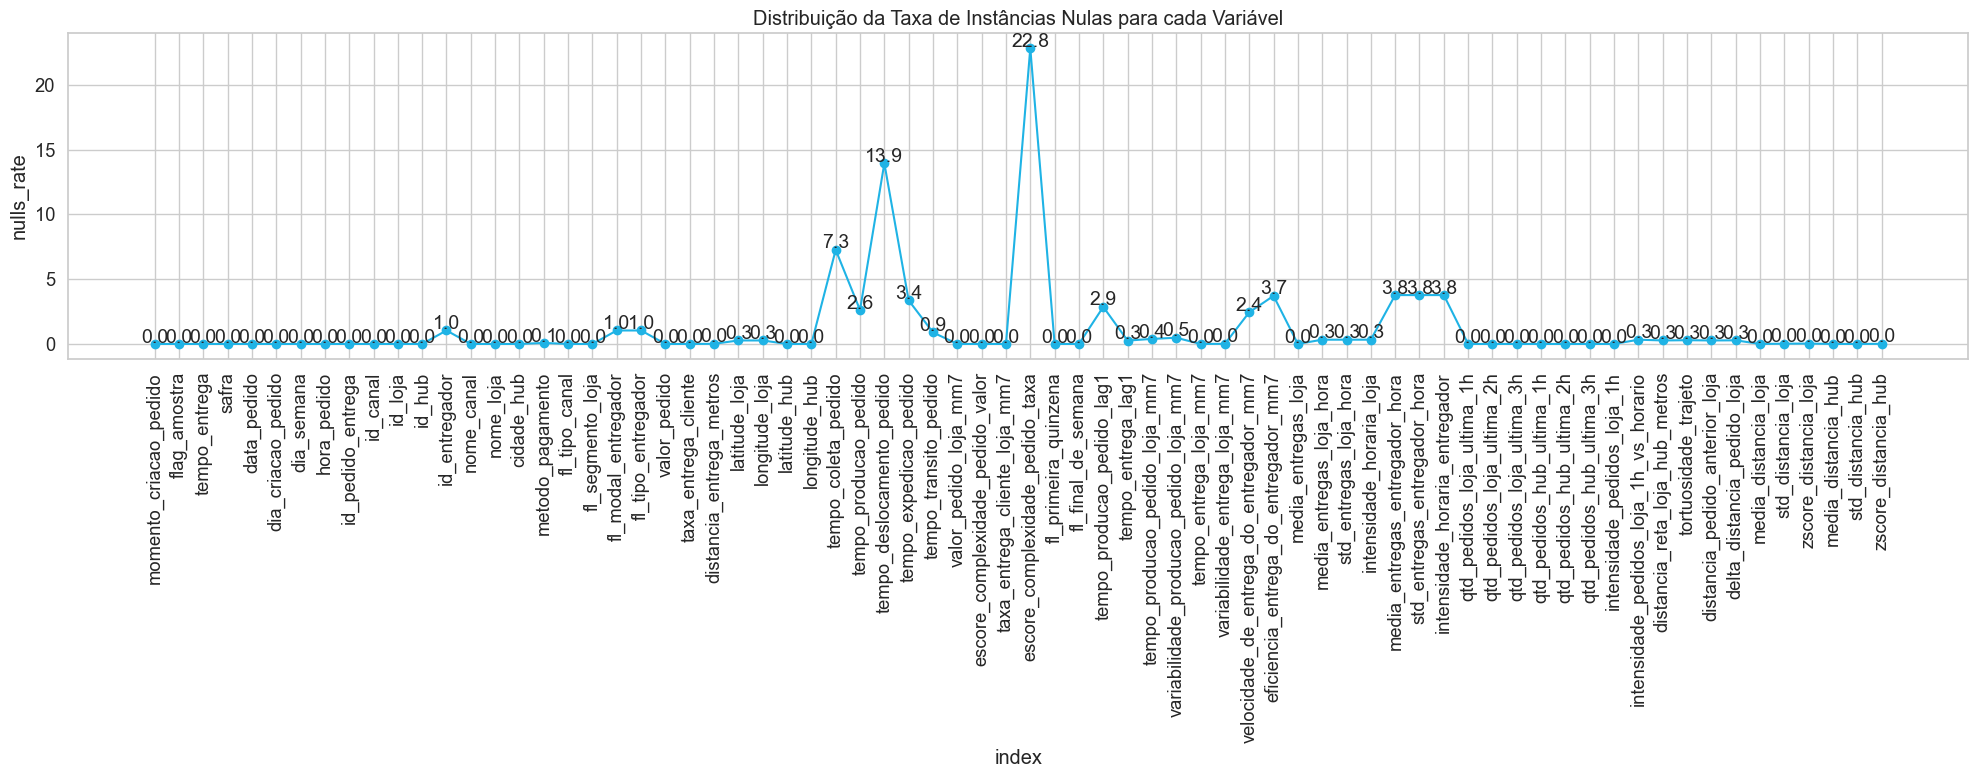

In [2]:
df_model = pd.read_parquet('../Modelo_Delivery/data/df_features.parquet')
df_model.sort_values(['momento_criacao_pedido'], ascending = True, inplace = True)

# Variável Target
variavel_target = ["tempo_entrega"]

# Variáveis Chave
variaveis_chave = [
    "flag_amostra",
    "safra",
    "momento_criacao_pedido",
    "data_pedido",
    "dia_criacao_pedido",
    "dia_semana",
    "hora_pedido",
    "id_pedido_entrega",
    "id_canal",
    "id_loja",
    "id_hub",
    "id_entregador"
]

# Variáveis Categóricas Multilabel
variaveis_categoricas_multilabel = [
    "nome_canal",
    "nome_loja",
    "cidade_hub",
    "metodo_pagamento"
]

# Variáveis Categóricas Binárias
variaveis_categoricas_binarias = [
    "fl_tipo_canal",
    "fl_segmento_loja",
    "fl_modal_entregador",
    "fl_tipo_entregador",
    "fl_primeira_quinzena",
    "fl_final_de_semana"
]

# Variáveis Quantitativas
variaveis_quantitativas = [
    "valor_pedido",
    "taxa_entrega_cliente",
    "distancia_entrega_metros",
    "valor_pedido_loja_mm7",
    "escore_complexidade_pedido_valor",
    "taxa_entrega_cliente_loja_mm7",
    "escore_complexidade_pedido_taxa",
    "tempo_producao_pedido_lag1",
    "tempo_entrega_lag1",
    "tempo_producao_pedido_loja_mm7",
    "variabilidade_producao_pedido_loja_mm7",
    "tempo_entrega_loja_mm7",
    "variabilidade_entrega_loja_mm7",
    "velocidade_de_entrega_do_entregador_mm7",
    "eficiencia_entrega_do_entregador_mm7",
    "media_entregas_loja",
    "media_entregas_loja_hora",
    "std_entregas_loja_hora",
    "intensidade_horaria_loja",
    "media_entregas_entregador_hora",
    "std_entregas_entregador_hora",
    "intensidade_horaria_entregador",
    "qtd_pedidos_loja_ultima_1h",
    "qtd_pedidos_loja_ultima_2h",
    "qtd_pedidos_loja_ultima_3h",
    "qtd_pedidos_hub_ultima_1h",
    "qtd_pedidos_hub_ultima_2h",
    "qtd_pedidos_hub_ultima_3h",
    "intensidade_pedidos_loja_1h",
    "intensidade_pedidos_loja_1h_vs_horario",
    "distancia_reta_loja_hub_metros",
    "tortuosidade_trajeto",
    "distancia_pedido_anterior_loja",
    "delta_distancia_pedido_loja",
    "media_distancia_loja",
    "std_distancia_loja",
    "zscore_distancia_loja",
    "media_distancia_hub",
    "std_distancia_hub",
    "zscore_distancia_hub"
]

# Análise de Nulos
df_nulls = (
    pd.DataFrame(
        df_model
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_model.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
print(f'Existem {len(variaveis_chave)} variáveis chave no Dataset')
print(f'Existem {len(variaveis_categoricas_multilabel)} variáveis categoricas multilabel no Dataset')
print(f'Existem {len(variaveis_categoricas_binarias)} variáveis categoricas binárias no Dataset')
print(f'Existem {len(variaveis_quantitativas)} variáveis quantitativas no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

df_train = df_model.loc[df_model['flag_amostra'] == 'treino'][variavel_target + variaveis_chave + variaveis_categoricas_multilabel + variaveis_categoricas_binarias + variaveis_quantitativas].copy()
df_valid = df_model.loc[df_model['flag_amostra'] == 'validacao'][variavel_target + variaveis_chave + variaveis_categoricas_multilabel + variaveis_categoricas_binarias + variaveis_quantitativas].copy()
df_test = df_model.loc[df_model['flag_amostra'] == 'teste'][variavel_target + variaveis_chave + variaveis_categoricas_multilabel + variaveis_categoricas_binarias + variaveis_quantitativas].copy()
df_oot = df_model.loc[df_model['flag_amostra'] == 'oot'][variavel_target + variaveis_chave + variaveis_categoricas_multilabel + variaveis_categoricas_binarias + variaveis_quantitativas].copy()


# <font color='green' style='font-size: 30px;'> 4.1) Pré-Processamento </font>
<hr style='border: 2px solid green;'>

> 1. Decidiu-se criar um CatBoost Encoder para as categóricas multilabel

> 2. LGBM é robusto a Outliers por ser um Modelo de Árvore

> 3. Como não há tantos nulos, optou-se por deixar o LGBM tratá-los 

In [3]:
cat_encoder(df_train, variaveis_categoricas_multilabel, variavel_target, True)
encoder_catboost = cat_encoder(df_train, variaveis_categoricas_multilabel, variavel_target, False)

train_cat_enc = encoder_catboost.transform(df_train[variaveis_categoricas_multilabel])
valid_cat_enc = encoder_catboost.transform(df_valid[variaveis_categoricas_multilabel])
test_cat_enc = encoder_catboost.transform(df_test[variaveis_categoricas_multilabel])
oot_cat_enc = encoder_catboost.transform(df_oot[variaveis_categoricas_multilabel])

df_train_base = df_train.drop(columns=variaveis_categoricas_multilabel)
df_valid_base = df_valid.drop(columns=variaveis_categoricas_multilabel)
df_test_base  = df_test.drop(columns=variaveis_categoricas_multilabel)
df_oot_base   = df_oot.drop(columns=variaveis_categoricas_multilabel)

df_train = df_train_base.join(train_cat_enc)
df_valid = df_valid_base.join(valid_cat_enc)
df_test  = df_test_base.join(test_cat_enc)
df_oot   = df_oot_base.join(oot_cat_enc)

p1 = df_train.loc[np.isfinite(df_train["tortuosidade_trajeto"]), "tortuosidade_trajeto"].quantile(0.01)
p99 = df_train.loc[np.isfinite(df_train["tortuosidade_trajeto"]), "tortuosidade_trajeto"].quantile(0.99)
df_train["tortuosidade_trajeto"] = df_train["tortuosidade_trajeto"].replace({-np.inf: p1,np.inf: p99})
df_valid["tortuosidade_trajeto"] = df_valid["tortuosidade_trajeto"].replace({-np.inf: p1,np.inf: p99})
df_test["tortuosidade_trajeto"] = df_test["tortuosidade_trajeto"].replace({-np.inf: p1,np.inf: p99})
df_oot["tortuosidade_trajeto"] = df_oot["tortuosidade_trajeto"].replace({-np.inf: p1,np.inf: p99})

p1 = df_train.loc[np.isfinite(df_train["escore_complexidade_pedido_taxa"]), "escore_complexidade_pedido_taxa"].quantile(0.01)
p99 = df_train.loc[np.isfinite(df_train["escore_complexidade_pedido_taxa"]), "escore_complexidade_pedido_taxa"].quantile(0.99)
df_train["escore_complexidade_pedido_taxa"] = df_train["escore_complexidade_pedido_taxa"].replace({-np.inf: p1,np.inf: p99})
df_valid["escore_complexidade_pedido_taxa"] = df_valid["escore_complexidade_pedido_taxa"].replace({-np.inf: p1,np.inf: p99})
df_test["escore_complexidade_pedido_taxa"] = df_test["escore_complexidade_pedido_taxa"].replace({-np.inf: p1,np.inf: p99})
df_oot["escore_complexidade_pedido_taxa"] = df_oot["escore_complexidade_pedido_taxa"].replace({-np.inf: p1,np.inf: p99})

# <font color='green' style='font-size: 30px;'> 4.2) Feature Selection </font>
<hr style='border: 2px solid green;'>

> 1. Optou-se por manter Features que possuíam impacto tanto via Feature Importance quanto via SHAP

> 2. Eliminou-se Features com Correlação de Spearman acima de 0.9, mantendo as de maiore Feature Importance ou SHAP dentre as correlacionadas, para evitar redundâncias 

> 3. Não se eliminou Features instáveis no tempo com base no PSI (Population Stability Index) pois mudanças de padrão podem ter alta influência no tempo de entrega, logo, o contexto demanda alta tempestividade 


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8414
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 50
[LightGBM] [Info] Start training from score 48.631826
Variáveis removidas por alta correlação (Spearman > 0.9):
 - distancia_reta_loja_hub_metros
 - intensidade_pedidos_loja_1h
 - media_entregas_loja
 - media_entregas_loja_hora
 - qtd_pedidos_hub_ultima_2h
 - qtd_pedidos_loja_ultima_2h
 - qtd_pedidos_loja_ultima_3h
 - std_entregas_entregador_hora
 - taxa_entrega_cliente


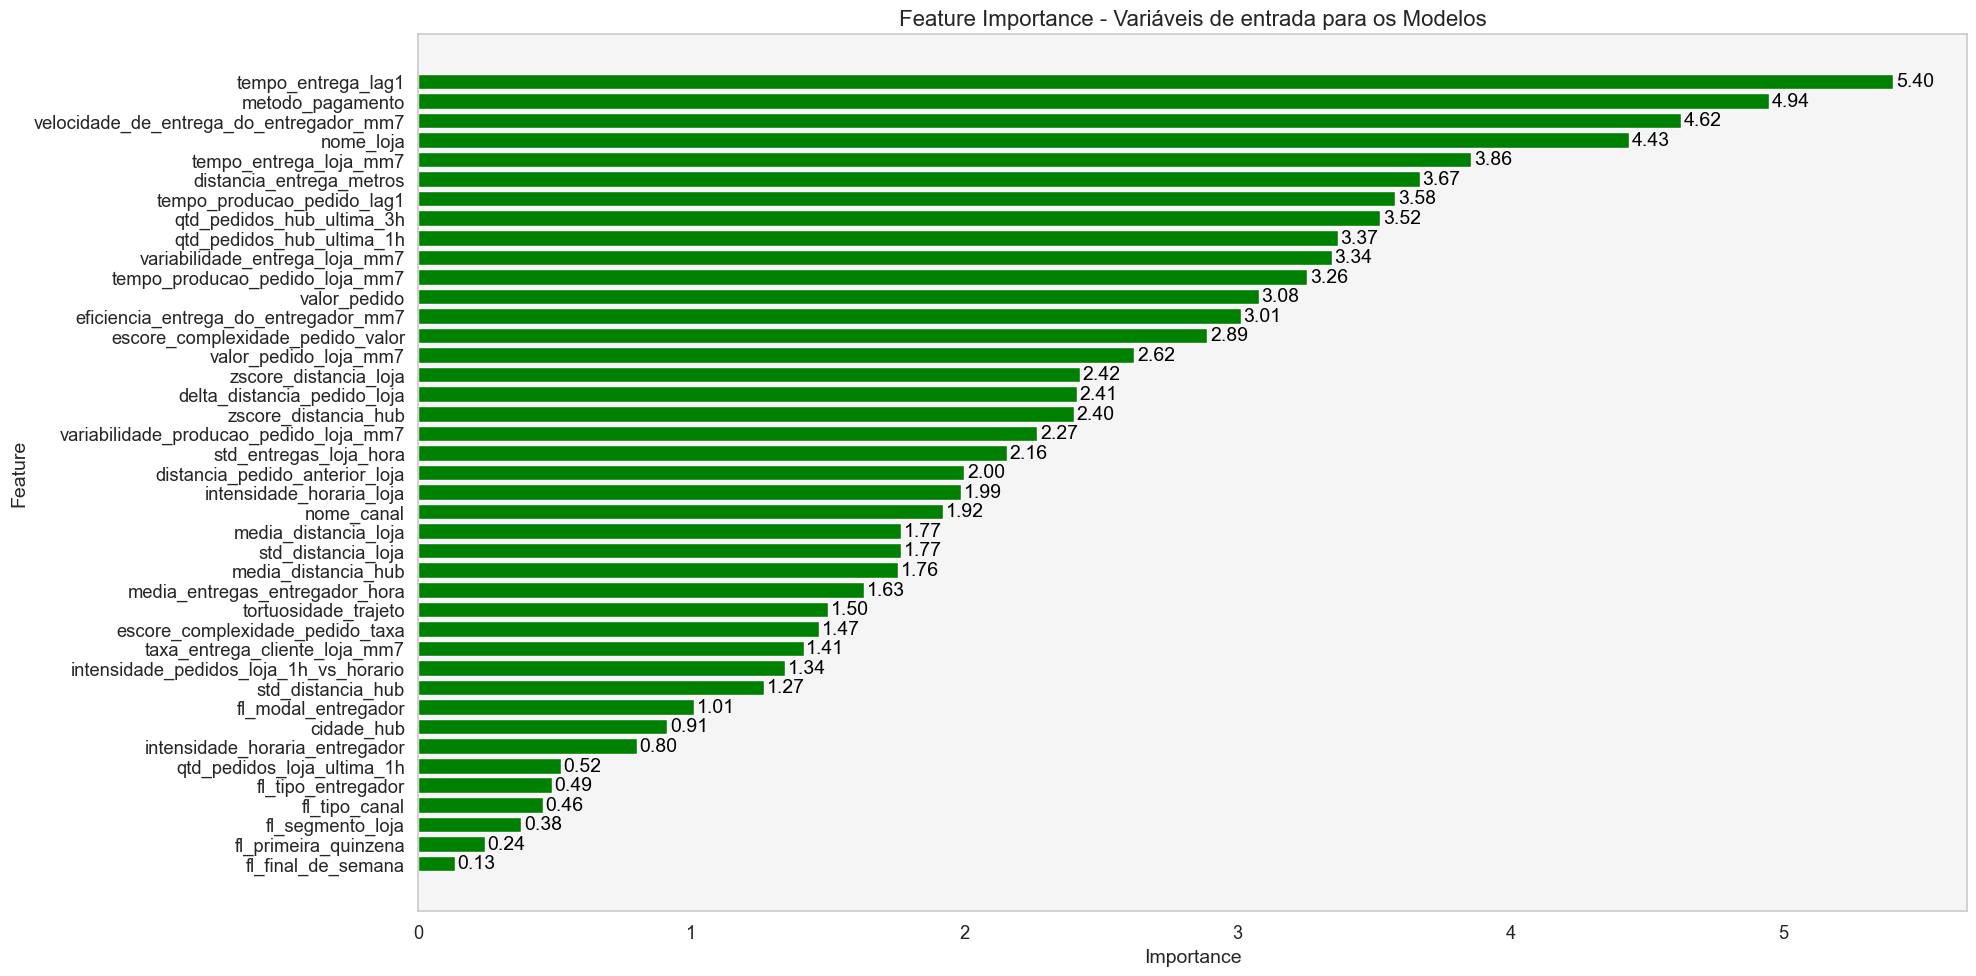

In [4]:
# Seleciona Variaveis Finais que passaram pela Feature Importance + Análise de Correlação
variaveis_finais = aplica_feature_selection_feature_importance(
    df_train[variavel_target + variaveis_categoricas_binarias + variaveis_categoricas_multilabel + variaveis_quantitativas].sample(100000, random_state=42), 
    'tempo_entrega', 
    variaveis_categoricas_binarias, 
    variaveis_categoricas_multilabel, 
    variaveis_quantitativas
)
variaveis_finais.to_excel('../Modelo_Delivery/models/feat_importance_feature_selection.xlsx', index = False)

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid", font_scale=1.2)

bars = plt.barh(variaveis_finais['feature'], variaveis_finais['importance'], color='green')
plt.title("Feature Importance - Variáveis de entrada para os Modelos", fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left', color='black', fontsize=14)


plt.tight_layout()
plt.grid(False)
plt.gca().set_facecolor('#F5F5F5')
plt.gca().invert_yaxis()
plt.show()


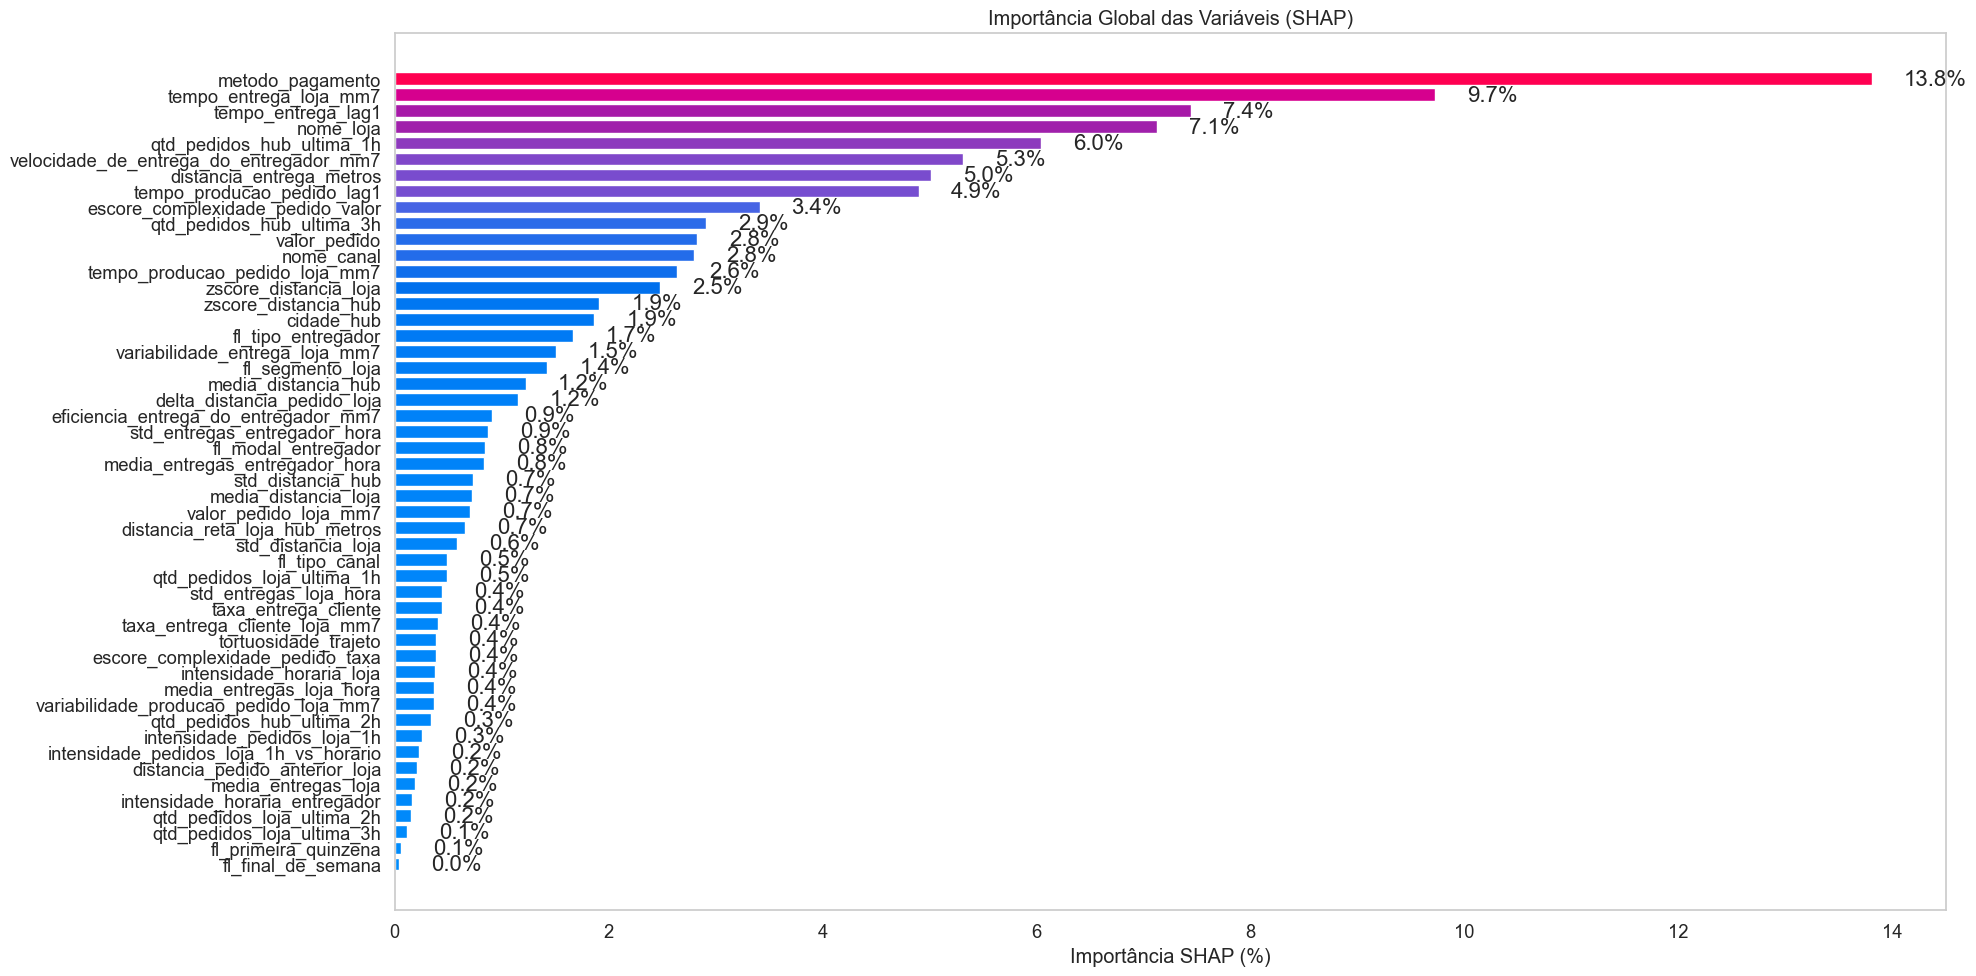

In [5]:
# Executa feature selection com SHAP
shap_output = aplica_feature_selection_shap(
    df_train[variavel_target+ variaveis_categoricas_binarias+ variaveis_categoricas_multilabel+ variaveis_quantitativas].sample(100000, random_state=42),
    target='tempo_entrega',
    binarias=variaveis_categoricas_binarias,
    categoricas=variaveis_categoricas_multilabel,
    quantitativas=variaveis_quantitativas
)

# Componentes retornados
variaveis_finais = shap_output["feature_importance"]
X_shap = shap_output["X"]
shap_values = shap_output["shap_values"]
model_shap = shap_output["model"]
variaveis_finais.to_excel('../Modelo_Delivery/models/shap_feature_selection.xlsx', index = False)

# Mean absolute SHAP
mean_abs_shap = np.abs(shap_values).mean(axis=0)

shap_bar_df = (
    pd.DataFrame({
        "feature": X_shap.columns,
        "mean_abs_shap": mean_abs_shap
    })
    .sort_values("mean_abs_shap", ascending=False)
)

# Normaliza para percentual
shap_bar_df["importance_pct"] = (
    shap_bar_df["mean_abs_shap"] /
    shap_bar_df["mean_abs_shap"].sum() * 100
)

# Número de variáveis exibidas
plot_df = shap_bar_df.iloc[::-1]  # inverte para ficar bonito no barh

# Normaliza para colormap
norm = plt.Normalize(
    plot_df["importance_pct"].min(),
    plot_df["importance_pct"].max()
)

colors = shap.plots.colors.red_blue(norm(plot_df["importance_pct"].values))

plt.figure(figsize=(20, 10))

bars = plt.barh(
    plot_df["feature"],
    plot_df["importance_pct"],
    color=colors
)

plt.xlabel("Importância SHAP (%)")
plt.title("Importância Global das Variáveis (SHAP)")
plt.grid(False)

# Labels de percentual
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.3,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1f}%",
        va="center",
        fontsize=16       # aumenta o tamanho da font
    )

plt.tight_layout()
plt.show()

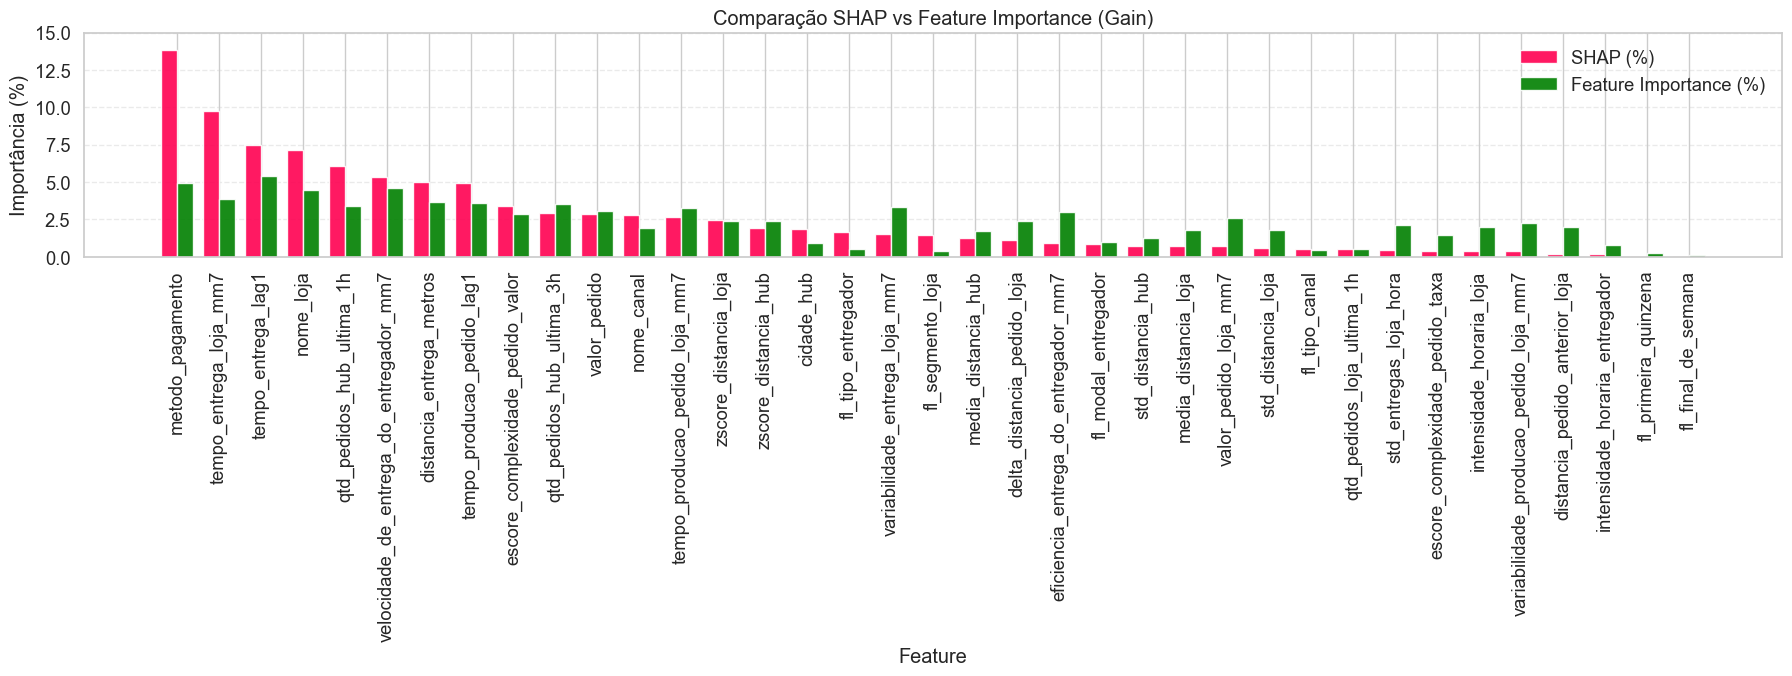

In [6]:
feat_importance_feature_selection = pd.read_excel('../Modelo_Delivery/models/feat_importance_feature_selection.xlsx')
shap_importance_feature_selection = pd.read_excel('../Modelo_Delivery/models/shap_feature_selection.xlsx').rename({'importance':'shap'}, axis = 1)
features_shap_feat_importance = shap_importance_feature_selection.merge(feat_importance_feature_selection,on='feature',how='outer')

# Garante ausência de NaN
features_shap_feat_importance["shap"] = features_shap_feat_importance["shap"].fillna(0)
features_shap_feat_importance["importance"] = features_shap_feat_importance["importance"].fillna(0)
features_shap_feat_importance = features_shap_feat_importance[
    (features_shap_feat_importance["shap"] > 0) &
    (features_shap_feat_importance["importance"] > 0)
]
features_shap_feat_importance['feature'].to_excel('../Modelo_Delivery/models/features_shap_feat_importance.xlsx')

# Ordena por relevância SHAP (ou use média se preferir)
features_shap_feat_importance = features_shap_feat_importance.sort_values("shap", ascending=False)

# Configurações básicas
features = features_shap_feat_importance["feature"]
x = np.arange(len(features))
width = 0.38

fig, ax = plt.subplots(figsize=(18, 7))

# Cores padrão (SHAP-like)
color_shap = "#ff0051"      # vermelho SHAP
color_gain = "green"

# Barras
bars_shap = ax.bar(
    x - width/2,
    features_shap_feat_importance["shap"],
    width,
    label="SHAP (%)",
    color=color_shap,
    alpha=0.9
)

bars_gain = ax.bar(
    x + width/2,
    features_shap_feat_importance["importance"],
    width,
    label="Feature Importance (%)",
    color=color_gain,
    alpha=0.9
)

# Eixos e rótulos
ax.set_ylabel("Importância (%)")
ax.set_xlabel("Feature")
ax.set_title("Comparação SHAP vs Feature Importance (Gain)")
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=90)
ax.set_ylim(0, 15)

# Grade horizontal
ax.yaxis.grid(True, linestyle="--", alpha=0.4)
ax.set_axisbelow(True)

# Legenda
ax.legend()

plt.tight_layout()
plt.show()


# <font color='green' style='font-size: 30px;'> 4.3) Modelagem </font>
<hr style='border: 2px solid green;'>

> 1. Como trata-se de uma Target com Distribuição Assimétrica à Direita, a ideia é testar diversas funções de custo diferentes como forma de analisar as nuances de cada uma: MAE, RMSE, Hubber Loss, RMSLE, Gamma

> 2. Como métricas do modelo, analisaremos: R2, MAE, RMSE, RMSLE, VAR20, Cohenn's Kappa

> 3. O modelo será um LightGBM Regressor com a função de custo Gamma:

- A função Gamma apresentou RMSE, RMSLE e Var20 coerentes com a função RMSLE, todavia, a Gamma superestima mais que subestima

- Em um contexto de Delivery, reportar o tempo de entrega maior do que realmente ele será (superestimação) é um erro aceitável.

In [7]:
target = ['tempo_entrega']
features = list(pd.read_excel('../Modelo_Delivery/models/features_shap_feat_importance.xlsx')['feature'].values)

x_train = separa_feature_target('tempo_entrega', df_train[target + features])[0]
y_train = separa_feature_target('tempo_entrega', df_train[target + features])[1]

x_valid = separa_feature_target('tempo_entrega', df_valid[target + features])[0]
y_valid = separa_feature_target('tempo_entrega', df_valid[target + features])[1]

x_test = separa_feature_target('tempo_entrega', df_test[target + features])[0]
y_test = separa_feature_target('tempo_entrega', df_test[target + features])[1]

x_oot = separa_feature_target('tempo_entrega', df_oot[target + features])[0]
y_oot = separa_feature_target('tempo_entrega', df_oot[target + features])[1]

print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)
print(y_test.shape)

print(x_oot.shape)
print(y_oot.shape)

(167204, 37)
(167204, 1)
(18578, 37)
(18578, 1)
(46446, 37)
(46446, 1)
(95537, 37)
(95537, 1)


In [8]:
# ################# TREINO MODELOS #################
# LightGBM com MAE
lgbm_mae, y_predict_train_lgbm_mae, y_predict_valid_lgbm_mae = Regressor('MAE', x_train, y_train, x_valid, y_valid)
# LightGBM com RMSE
lgbm_rmse, y_predict_train_lgbm_rmse, y_predict_valid_lgbm_rmse = Regressor('RMSE', x_train, y_train, x_valid, y_valid)
# LightGBM com Huber
lgbm_huber, y_predict_train_lgbm_huber, y_predict_valid_lgbm_huber = Regressor('Huber', x_train, y_train, x_valid, y_valid)
# LightGBM com RMSLE
lgbm_rmsle, y_predict_train_lgbm_rmsle, y_predict_valid_lgbm_rmsle = Regressor('RMSLE', x_train, y_train, x_valid, y_valid)
# LightGBM com Gamma
lgbm_gamma, y_predict_train_lgbm_gamma, y_predict_valid_lgbm_gamma = Regressor('Gamma', x_train, y_train, x_valid, y_valid)

################# MÉTRICAS GERAIS #################
metricas_lgbm_mae = metricas_regressao('LightGBM com MAE', y_train, y_predict_train_lgbm_mae, y_valid, y_predict_valid_lgbm_mae, 'treino', 'validacao', False)
metricas_lgbm_rmse = metricas_regressao('LightGBM com RMSE', y_train, y_predict_train_lgbm_rmse, y_valid, y_predict_valid_lgbm_rmse, 'treino', 'validacao', False)
metricas_lgbm_huber = metricas_regressao('LightGBM com Huber', y_train, y_predict_train_lgbm_huber, y_valid, y_predict_valid_lgbm_huber, 'treino', 'validacao', False)
metricas_lgbm_rmsle = metricas_regressao('LightGBM com RMSLE', y_train, y_predict_train_lgbm_rmsle, y_valid, y_predict_valid_lgbm_rmsle, 'treino', 'validacao', False)
metricas_lgbm_gamma = metricas_regressao('LightGBM com Gamma', y_train, y_predict_train_lgbm_gamma, y_valid, y_predict_valid_lgbm_gamma, 'treino', 'validacao', False)
print('Métricas Gerais')
metricas_finais = metricas_modelos_juntos_regressao(
     [
         metricas_lgbm_mae, 
         metricas_lgbm_rmse,
         metricas_lgbm_huber,
         metricas_lgbm_rmsle,
         metricas_lgbm_gamma
     ]
)
display(metricas_finais)

Métricas Gerais


,MAE,RMSE,RMSLE,MAPE (%),Var20 (%),Subestimação (%),Superestimação (%),CohenKappa,Etapa,Modelo,Pct_amostras (%)
0,12.36,22.30,0.32,24.01,53.41,22.22,24.37,0.14,treino,LightGBM com MAE,100.00
1,12.60,22.54,0.33,24.66,51.98,22.58,25.45,0.12,validacao,LightGBM com MAE,100.00
2,12.60,20.28,0.32,27.65,48.96,16.33,34.71,0.11,treino,LightGBM com RMSE,100.00
3,13.02,21.52,0.33,28.38,48.00,16.56,35.44,0.11,validacao,LightGBM com RMSE,100.00
4,15.74,28.40,0.40,32.41,42.66,20.03,37.30,0.02,treino,LightGBM com Huber,100.00
5,15.73,28.34,0.40,32.72,42.15,19.80,38.06,0.02,validacao,LightGBM com Huber,100.00
6,12.31,21.34,0.32,24.65,51.83,20.57,27.61,0.12,treino,LightGBM com RMSLE,100.00
7,12.58,22.02,0.32,25.27,51.24,20.76,28.00,0.11,validacao,LightGBM com RMSLE,100.00
8,12.64,20.83,0.32,27.16,49.46,16.59,33.95,0.11,treino,LightGBM com Gamma,100.00
9,12.91,21.54,0.33,27.80,48.44,16.86,34.70,0.11,validacao,LightGBM com Gamma,100.00


# <font color='green' style='font-size: 30px;'> 4.4) Otimização </font>
<hr style='border: 2px solid green;'>

> 1. Faremos um RFE eliminando recursivamente as piores Features e analisarmos a função de custo para compreender até onde podemos remover

> 2. O algoritmo de Otimização será o HyperOpt



In [85]:
# Otimizador via HyperOpt
model_otimizado, y_predict_train_otimizado, y_predict_valid_otimizado, hiperparametros, best_hiperpams = otimizacao_hyperopt_regression(x_train, y_train, x_valid, y_valid, 25)
metricas_otimizadas_lgbm = metricas_regressao('LGBM + HyperOpt',  y_train, y_predict_train_otimizado, y_valid, y_predict_valid_otimizado, 'treino', 'validacao', False)

100%|██████████| 25/25 [02:04<00:00,  4.98s/trial, best loss: 0.3347784679693608]


In [86]:
# ################# MÉTRICAS CONSOLIDADAS #################
print('Métricas Gerais')
metricas_finais = metricas_modelos_juntos_regressao(
     [
         metricas_lgbm_mae, 
         metricas_lgbm_rmse,
         metricas_lgbm_huber,
         metricas_lgbm_rmsle,
         metricas_lgbm_gamma,
         metricas_otimizadas_lgbm
     ]
)
display(metricas_finais)
display(hiperparametros)

Métricas Gerais


,MAE,RMSE,RMSLE,MAPE (%),Var20 (%),Subestimação (%),Superestimação (%),CohenKappa,Etapa,Modelo,Pct_amostras (%)
0,12.36,22.30,0.32,24.01,53.41,22.22,24.37,0.14,treino,LightGBM com MAE,100.00
1,12.60,22.54,0.33,24.66,51.98,22.58,25.45,0.12,validacao,LightGBM com MAE,100.00
2,12.60,20.28,0.32,27.65,48.96,16.33,34.71,0.11,treino,LightGBM com RMSE,100.00
3,13.02,21.52,0.33,28.38,48.00,16.56,35.44,0.11,validacao,LightGBM com RMSE,100.00
4,15.74,28.40,0.40,32.41,42.66,20.03,37.30,0.02,treino,LightGBM com Huber,100.00
5,15.73,28.34,0.40,32.72,42.15,19.80,38.06,0.02,validacao,LightGBM com Huber,100.00
6,12.31,21.34,0.32,24.65,51.83,20.57,27.61,0.12,treino,LightGBM com RMSLE,100.00
7,12.58,22.02,0.32,25.27,51.24,20.76,28.00,0.11,validacao,LightGBM com RMSLE,100.00
8,12.64,20.83,0.32,27.16,49.46,16.59,33.95,0.11,treino,LightGBM com Gamma,100.00
9,12.91,21.54,0.33,27.80,48.44,16.86,34.70,0.11,validacao,LightGBM com Gamma,100.00


,colsample_bytree,learning_rate,max_bin,max_depth,min_data_in_leaf,min_split_gain,min_sum_hessian_in_leaf,n_estimators,num_leaves,reg_alpha,reg_lambda,subsample
0,0.67,0.02,128,12,400,0.14,0.00,700,50,0.19,0.33,0.79


In [87]:
carrega_salva_modelo('salvar', model_otimizado)

Modelo de risk_transaction Treinado e Salvo com Sucesso!


# <font color='green' style='font-size: 30px;'> 4.5) Análise de Resultados </font>
<hr style='border: 2px solid green;'>

> 1. Análise do Modelo Otimizado:

- Como métricas do modelo, analisaremos: R2, MAE, RMSE, RMSLE, VAR20, Cohenn's Kappa para Treino, Validação, Teste e OOT 
- Como métricas do modelo, analisaremos: R2, MAE, RMSE, RMSLE, VAR20, Cohenn's Kappa para OOT na visão Diária
- Como métricas de estabilidade, analisaremos: PSI

In [174]:
################# VARIÁVEIS, ENCODER E MODELO #################
target = ['tempo_entrega']
variaveis_chave = [
    "flag_amostra",
    "safra",
    "momento_criacao_pedido",
    "data_pedido",
    "dia_criacao_pedido",
    "dia_semana",
    "hora_pedido",
    "id_pedido_entrega",
    "id_canal",
    "id_loja",
    "id_hub",
    "id_entregador"
]

variaveis_categoricas_multilabel = [
    "nome_canal",
    "nome_loja",
    "cidade_hub",
    "metodo_pagamento"
]

features = list(pd.read_excel('../Modelo_Delivery/models/features_shap_feat_importance.xlsx')['feature'].values)
encoder_catboost = cat_encoder(False)
modelo_otimizado = carrega_salva_modelo('carregar')

################# DataFrame #################
df_model = pd.read_parquet('../Modelo_Delivery/data/df_features.parquet')
df_model.sort_values(['momento_criacao_pedido'], ascending = True, inplace = True)

df_train = df_model.loc[df_model['flag_amostra'] == 'treino'][target + variaveis_chave + features].copy()
df_valid = df_model.loc[df_model['flag_amostra'] == 'validacao'][target + variaveis_chave + features].copy()
df_test = df_model.loc[df_model['flag_amostra'] == 'teste'][target + variaveis_chave + features].copy()
df_oot = df_model.loc[df_model['flag_amostra'] == 'oot'][target + variaveis_chave + features].copy()

################# Pré-Processamento #################
train_cat_enc = encoder_catboost.transform(df_train[variaveis_categoricas_multilabel])
valid_cat_enc = encoder_catboost.transform(df_valid[variaveis_categoricas_multilabel])
test_cat_enc = encoder_catboost.transform(df_test[variaveis_categoricas_multilabel])
oot_cat_enc = encoder_catboost.transform(df_oot[variaveis_categoricas_multilabel])

df_train_base = df_train.drop(columns=variaveis_categoricas_multilabel)
df_valid_base = df_valid.drop(columns=variaveis_categoricas_multilabel)
df_test_base  = df_test.drop(columns=variaveis_categoricas_multilabel)
df_oot_base   = df_oot.drop(columns=variaveis_categoricas_multilabel)

df_train = df_train_base.join(train_cat_enc)
df_valid = df_valid_base.join(valid_cat_enc)
df_test  = df_test_base.join(test_cat_enc)
df_oot   = df_oot_base.join(oot_cat_enc)

p1 = df_train.loc[np.isfinite(df_train["escore_complexidade_pedido_taxa"]), "escore_complexidade_pedido_taxa"].quantile(0.01)
p99 = df_train.loc[np.isfinite(df_train["escore_complexidade_pedido_taxa"]), "escore_complexidade_pedido_taxa"].quantile(0.99)
df_train["escore_complexidade_pedido_taxa"] = df_train["escore_complexidade_pedido_taxa"].replace({-np.inf: p1,np.inf: p99})
df_valid["escore_complexidade_pedido_taxa"] = df_valid["escore_complexidade_pedido_taxa"].replace({-np.inf: p1,np.inf: p99})
df_test["escore_complexidade_pedido_taxa"] = df_test["escore_complexidade_pedido_taxa"].replace({-np.inf: p1,np.inf: p99})
df_oot["escore_complexidade_pedido_taxa"] = df_oot["escore_complexidade_pedido_taxa"].replace({-np.inf: p1,np.inf: p99})

################# Separação Features e Target #################
x_train = separa_feature_target('tempo_entrega', df_train[target + features])[0]
y_train = separa_feature_target('tempo_entrega', df_train[target + features])[1]
y_predict_train = modelo_otimizado.predict(x_train)

x_valid = separa_feature_target('tempo_entrega', df_valid[target + features])[0]
y_valid = separa_feature_target('tempo_entrega', df_valid[target + features])[1]
y_predict_valid = modelo_otimizado.predict(x_valid)

x_test = separa_feature_target('tempo_entrega', df_test[target + features])[0]
y_test = separa_feature_target('tempo_entrega', df_test[target + features])[1]
y_predict_test = modelo_otimizado.predict(x_test)

x_oot = separa_feature_target('tempo_entrega', df_oot[target + features])[0]
y_oot = separa_feature_target('tempo_entrega', df_oot[target + features])[1]
y_predict_oot = modelo_otimizado.predict(x_oot)


################# DATAFRAME CONSOLIDADO #################
df_train["y_predict"] = modelo_otimizado.predict(x_train)
df_valid["y_predict"] = modelo_otimizado.predict(x_valid)
df_test["y_predict"] = modelo_otimizado.predict(x_test)
df_oot["y_predict"] = modelo_otimizado.predict(x_oot)

df_model = pd.concat([df_train, df_valid, df_test, df_oot], axis=0)


In [175]:
################# MÉTRICAS FINAIS #################
metricas_otimizadas_lgbm_train_test = metricas_regressao('LGBM + HyperOpt',  y_train, y_predict_train, y_valid, y_predict_valid, 'treino', 'validacao', False)
metricas_otimizadas_lgbm_test_oot = metricas_regressao('LGBM + HyperOpt',  y_test, y_predict_test, y_oot, y_predict_oot, 'teste', 'oot', False)
print('Métricas de Treino, Validação, Teste e OOT')
metricas_finais = metricas_modelos_juntos_regressao(
     [
         metricas_otimizadas_lgbm_train_test, 
         metricas_otimizadas_lgbm_test_oot
     ]
)
display(metricas_finais)

Métricas de Treino, Validação, Teste e OOT


,MAE,RMSE,RMSLE,MAPE (%),Var20 (%),Subestimação (%),Superestimação (%),CohenKappa,Etapa,Modelo,Pct_amostras (%)
0,12.70,21.07,0.32,27.24,49.55,16.50,33.94,0.11,treino,LGBM + HyperOpt,100.00
1,12.93,21.62,0.33,27.83,48.47,16.83,34.70,0.11,validacao,LGBM + HyperOpt,100.00
2,13.18,22.23,0.33,27.84,48.75,17.05,34.20,0.11,teste,LGBM + HyperOpt,100.00
3,13.50,22.77,0.34,29.16,47.85,15.44,36.71,0.11,oot,LGBM + HyperOpt,100.00


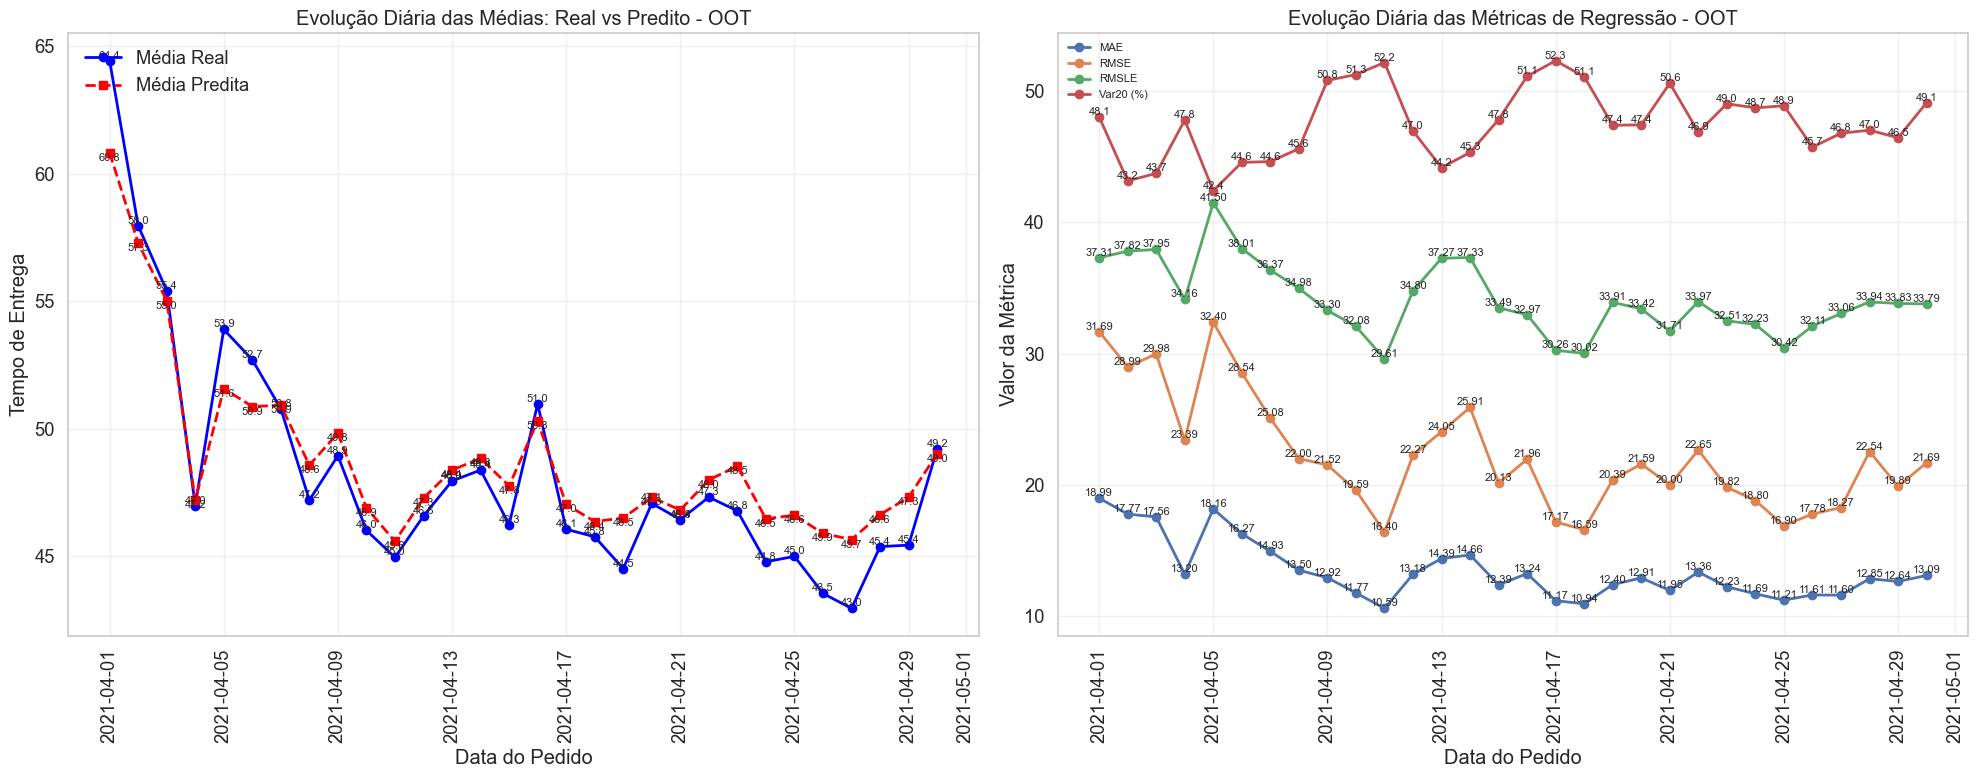

In [176]:
# Calcular médias diárias do tempo de entrega real e predito
# Primeiro, vamos criar um DataFrame com as médias diárias
df_oot = df_model.loc[df_model['flag_amostra'] == 'oot']
medias_diarias = df_oot.groupby('data_pedido').agg({
    'tempo_entrega': 'mean',
    'y_predict': 'mean'
}).reset_index()

# Calcular métricas diárias
df_metricas_diarias = metricas_regressao_diarias(
    df=df_oot,
    coluna_data="data_pedido",
    y_true_col="tempo_entrega",
    y_pred_col="y_predict"
)

# Criar figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# ===== SUBPLOT 1: Médias do tempo de entrega e predição =====
ax1 = axes[0]

# Plot das médias
ax1.plot(medias_diarias["data_pedido"], medias_diarias["tempo_entrega"], 
         marker="o", label="Média Real", linewidth=2, color='blue')
ax1.plot(medias_diarias["data_pedido"], medias_diarias["y_predict"], 
         marker="s", label="Média Predita", linewidth=2, color='red', linestyle='--')

# Adicionar valores nos pontos (opcional - pode remover se ficar poluído)
for _, row in medias_diarias.iterrows():
    x = row["data_pedido"]
    
    # Valor do tempo real
    ax1.text(x, row["tempo_entrega"], f"{row['tempo_entrega']:.1f}", 
             fontsize=8, ha="center", va="bottom")
    
    # Valor da predição
    ax1.text(x, row["y_predict"], f"{row['y_predict']:.1f}", 
             fontsize=8, ha="center", va="top")

# Configurações do gráfico 1
ax1.set_xlabel("Data do Pedido")
ax1.set_ylabel("Tempo de Entrega")
ax1.set_title("Evolução Diária das Médias: Real vs Predito - OOT")
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=90)

# ===== SUBPLOT 2: Métricas de regressão =====
ax2 = axes[1]

# Plot das métricas
ax2.plot(df_metricas_diarias["data_pedido"], df_metricas_diarias["MAE"], 
         marker="o", label="MAE", linewidth=2)
ax2.plot(df_metricas_diarias["data_pedido"], df_metricas_diarias["RMSE"], 
         marker="o", label="RMSE", linewidth=2)
ax2.plot(df_metricas_diarias["data_pedido"], df_metricas_diarias["RMSLE"], 
         marker="o", label="RMSLE", linewidth=2)
ax2.plot(df_metricas_diarias["data_pedido"], df_metricas_diarias["Var20 (%)"], 
         marker="o", label="Var20 (%)", linewidth=2)

# Adicionar valores em cada ponto
for _, row in df_metricas_diarias.iterrows():
    x = row["data_pedido"]

    ax2.text(x, row["MAE"], f"{row['MAE']:.2f}", fontsize=8,
             ha="center", va="bottom")
    
    ax2.text(x, row["RMSE"], f"{row['RMSE']:.2f}", fontsize=8,
             ha="center", va="bottom")
    
    ax2.text(x, row["RMSLE"], f"{row['RMSLE']:.2f}", fontsize=8,
             ha="center", va="bottom")
    
    ax2.text(x, row["Var20 (%)"], f"{row['Var20 (%)']:.1f}",
             fontsize=8, ha="center", va="bottom")

# Configurações do gráfico 2
ax2.set_xlabel("Data do Pedido")
ax2.set_ylabel("Valor da Métrica")
ax2.set_title("Evolução Diária das Métricas de Regressão - OOT")
ax2.legend(loc='upper left', fontsize = 8)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=90)

# Ajustar layout
plt.tight_layout()
plt.show()

📊 ANÁLISE PSI TEMPORAL
Período base: 2021-01-01 a 2021-03-30
Período teste: 2021-04-01 a 2021-04-30
Registros base: 224,201 | Registros teste: 92,187


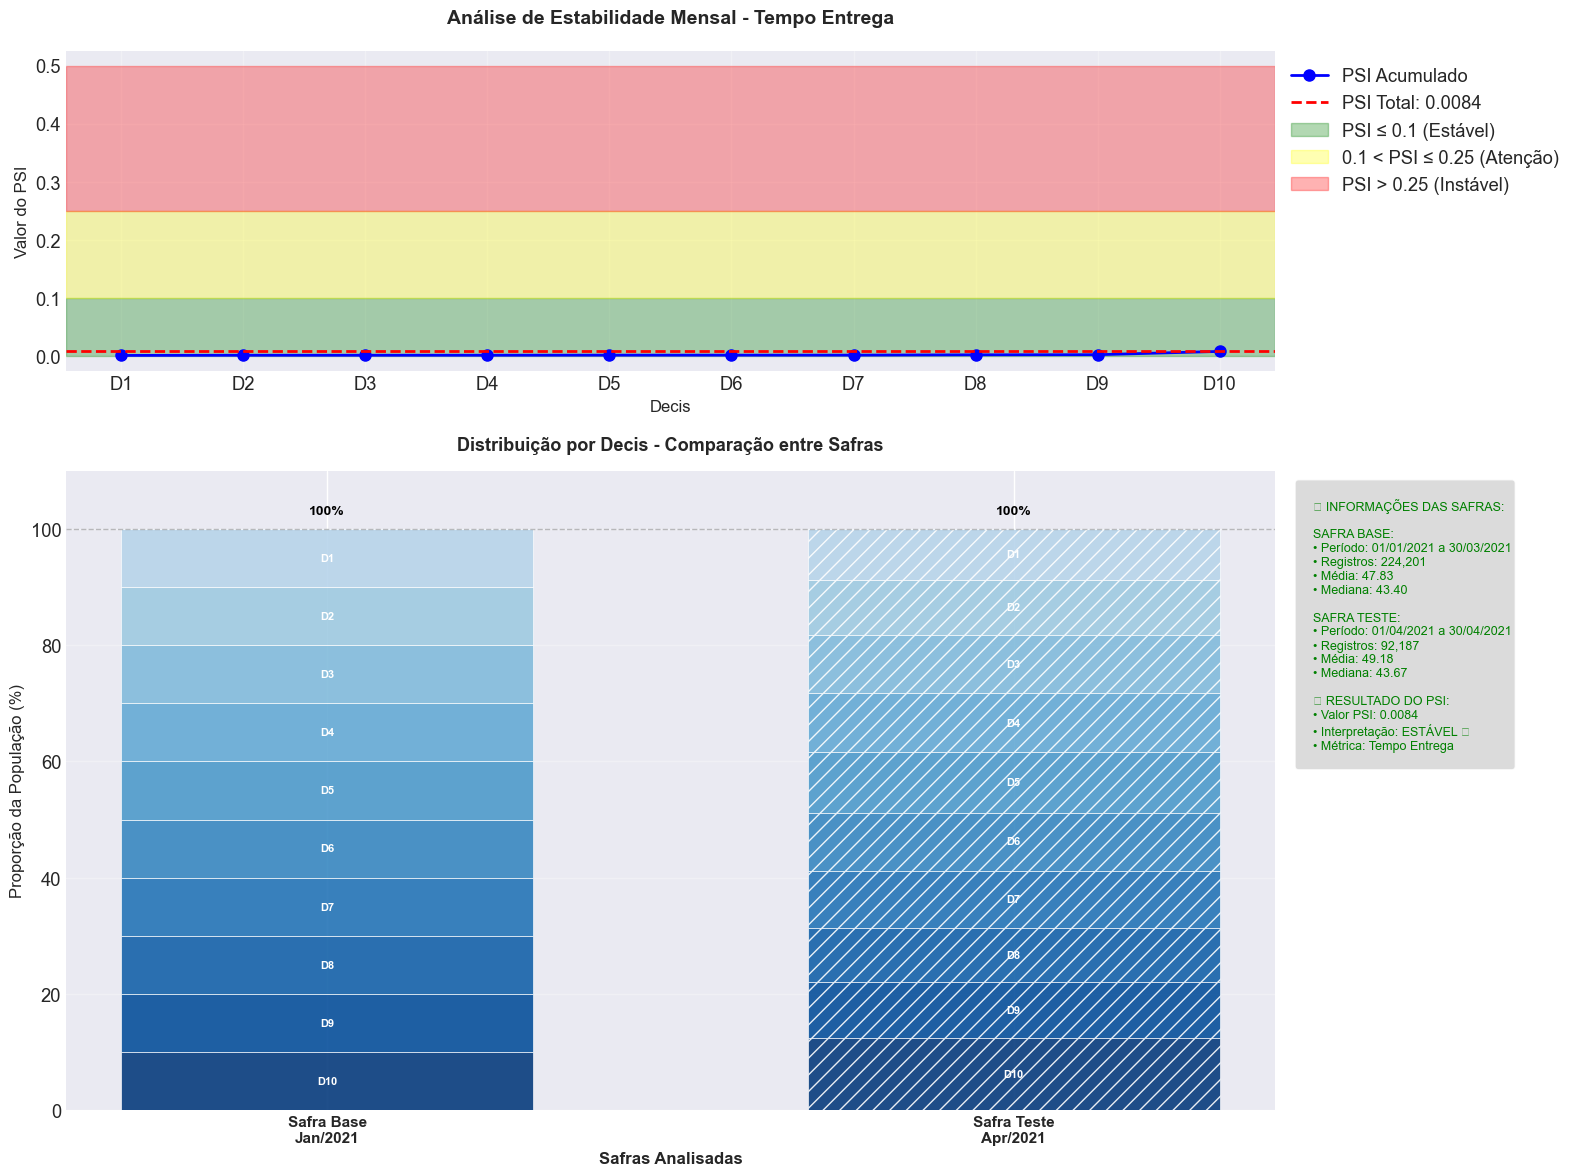


🎯 RESULTADO FINAL: PSI = 0.0084 - ESTÁVEL ✅

📋 DETALHAMENTO POR DECIL:
Decil  % Base     % Teste    Diferença    PSI Comp. 
------------------------------------------------------------
D1     10.00      8.82       -1.18        0.0015    
D2     10.00      9.44       -0.56        0.0003    
D3     10.00      10.03      0.03         0.0000    
D4     10.00      10.16      0.16         0.0000    
D5     10.00      10.36      0.36         0.0001    
D6     10.00      9.96       -0.04        0.0000    
D7     10.00      9.89       -0.11        0.0000    
D8     10.00      9.27       -0.73        0.0006    
D9     10.00      9.55       -0.45        0.0002    
D10    10.00      12.52      2.52         0.0057    


In [91]:
psi_valor, psi_df = calcular_psi_temporal(
    df=df_model,
    coluna_data='data_pedido',
    coluna_metricas='y_predict',
    nome_metrica='Tempo Entrega',
    data_base_inicio='2021-01-01', 
    data_base_fim='2021-03-30',
    data_teste_inicio='2021-04-01',
    data_teste_fim='2021-04-30',
    tipo_analise='mensal'
)

# <font color='green' style='font-size: 30px;'> 4.6) Intervalos de Confiança via Modelo SKPRO Residual Double</font>
<hr style='border: 2px solid green;'>

> 1. Criação do Modelo de Intervalo de Confiança

In [63]:
skpro_residual_double(
    target="tempo_entrega",
    x_train=x_train, y_train=y_train,
    x_valid=x_valid, y_valid=y_valid,
    x_test=x_test, y_test=y_test,
    x_oot=x_oot, y_oot=y_oot,
    modelo_otimizado=modelo_otimizado,
    alpha=0.1,
    salvar = True
)

In [177]:
################# SKPRO MODELO RESIDUAL DOUBLE #################
resultado = skpro_residual_double(
    target="tempo_entrega",
    x_train=x_train, y_train=y_train,
    x_valid=x_valid, y_valid=y_valid,
    x_test=x_test, y_test=y_test,
    x_oot=x_oot, y_oot=y_oot,
    modelo_otimizado=modelo_otimizado,
    alpha=0.1
)
df_train["ic_inferior"] = resultado["train"]["ic_inferior"]
df_train["ic_superior"] = resultado["train"]["ic_superior"]

df_valid["ic_inferior"] = resultado["valid"]["ic_inferior"]
df_valid["ic_superior"] = resultado["valid"]["ic_superior"]

df_test["ic_inferior"] = resultado["test"]["ic_inferior"]
df_test["ic_superior"] = resultado["test"]["ic_superior"]

df_oot["ic_inferior"] = resultado["oot"]["ic_inferior"]
df_oot["ic_superior"] = resultado["oot"]["ic_superior"]


Coverage Treino: 0.861
Coverage Validação: 0.861
Coverage Teste: 0.854
Coverage OOT: 0.849


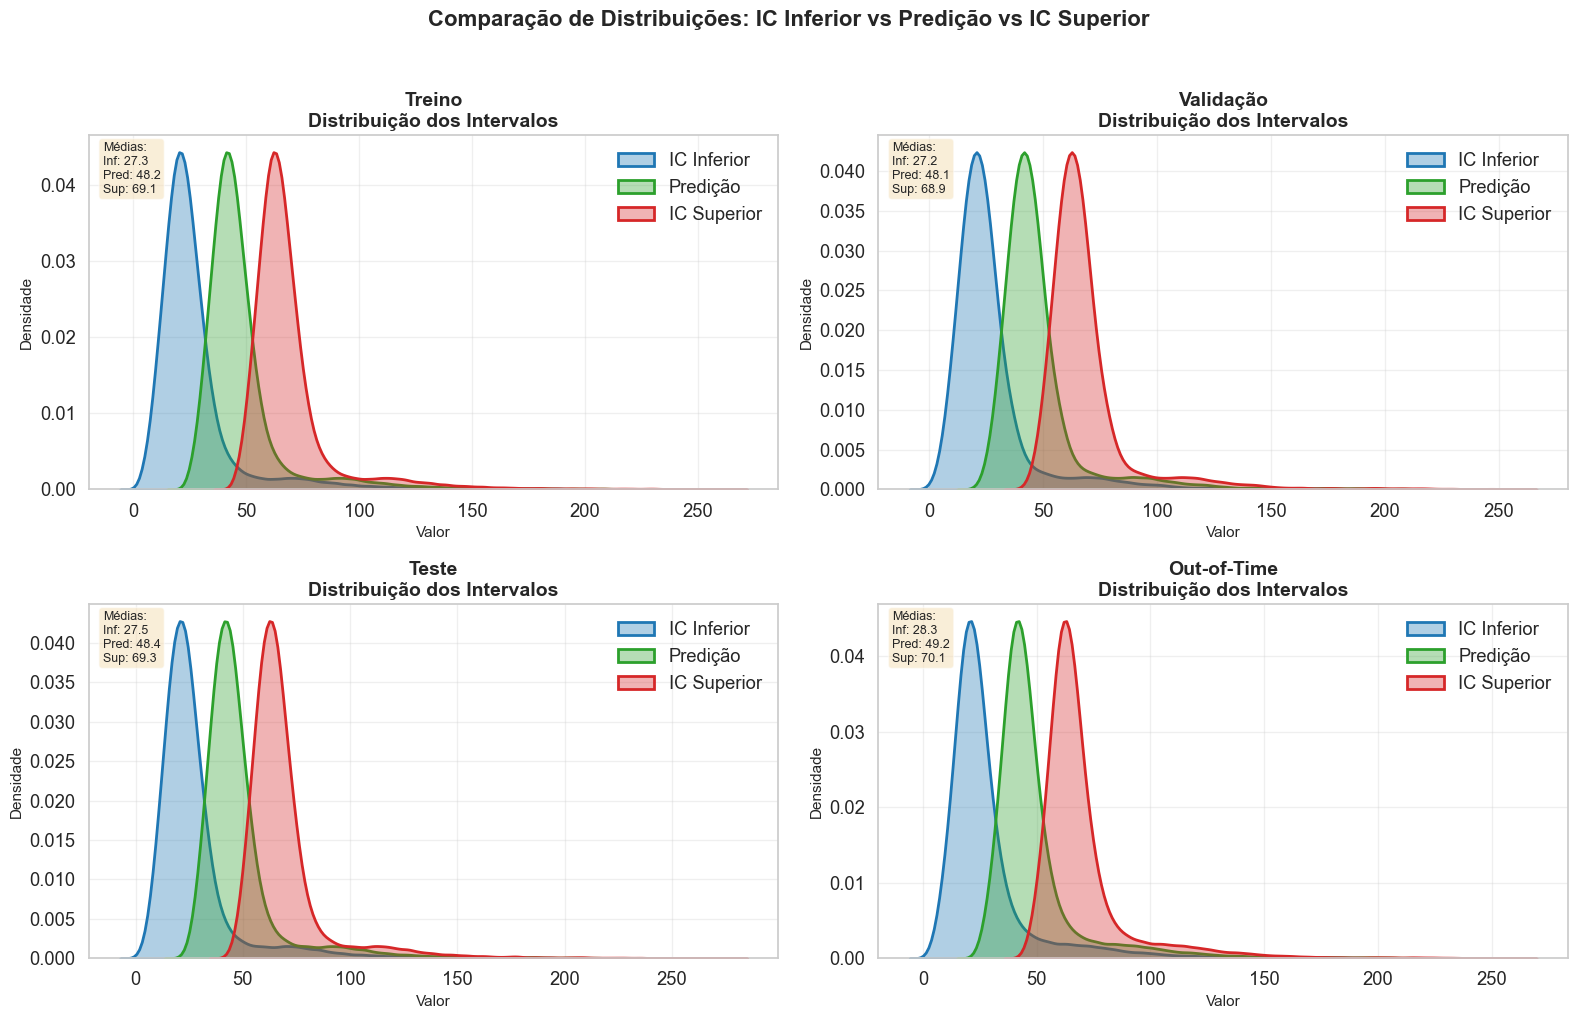

In [178]:
plot_kde_comparativo(df_train, df_valid, df_test, df_oot, figsize=(16, 10), colors=None, alpha=0.7)

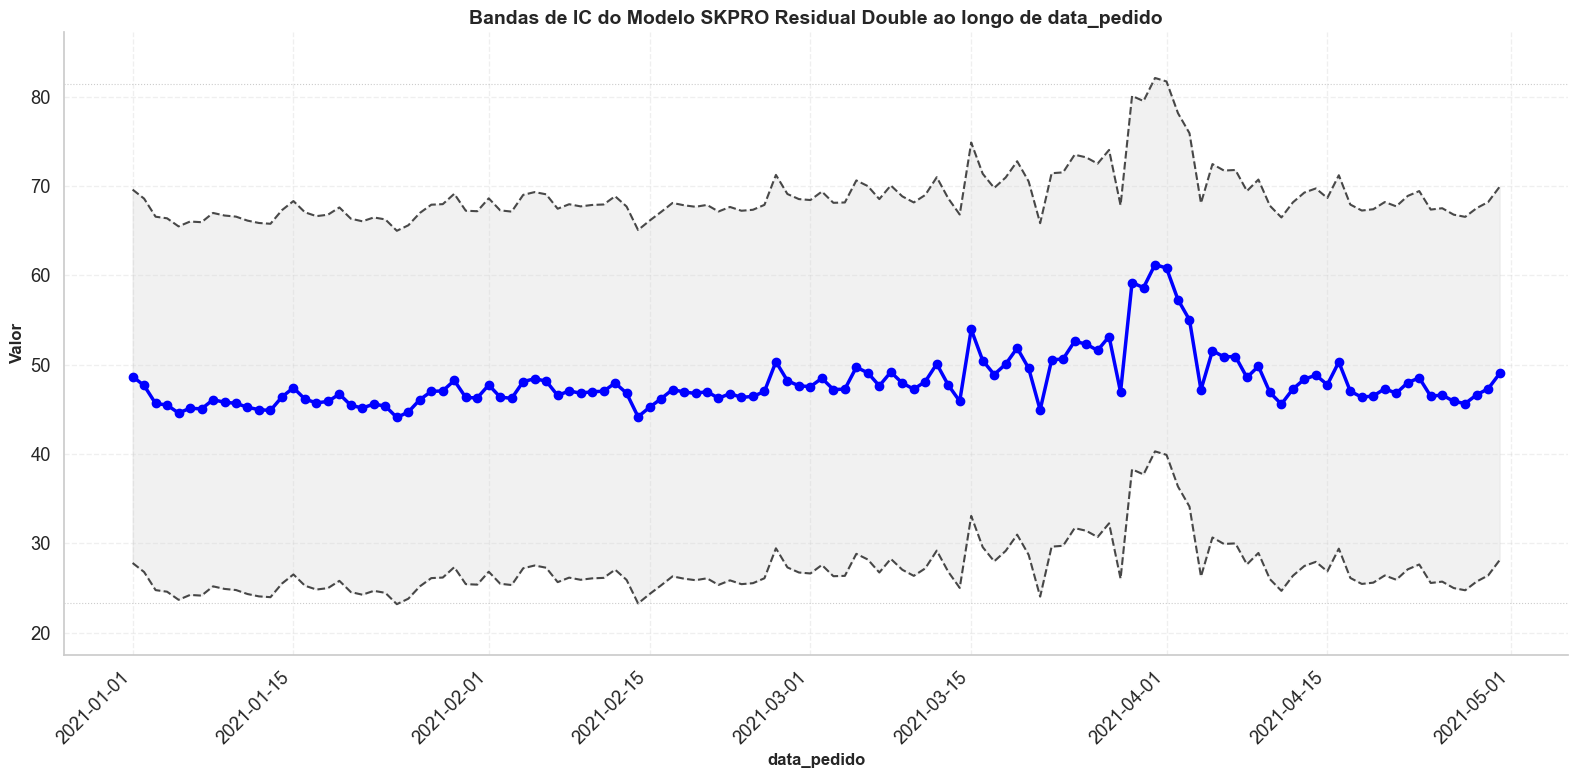

In [180]:
plot_bandas_temporais_unico(df_train, df_valid, df_test, df_oot, 'data_pedido')

# <font color='green' style='font-size: 30px;'> 4.7) Explicabilidade </font>
<hr style='border: 2px solid green;'>

> 1. Explicabilidade Geral via SHAP

> 2. Explicabilidade por Book via SHAP (Soma de SHAP por Book de Variáveis)

> 3. Exemplos via SHAP Individual

In [163]:
def plot_shap_beeswarm(model, X, titulo, max_display=30):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(
        shap_values,
        X,
        plot_type="dot",
        max_display=max_display,
        show=False
    )
    plt.title(titulo, fontsize=14)
    plt.tight_layout()
    plt.show()


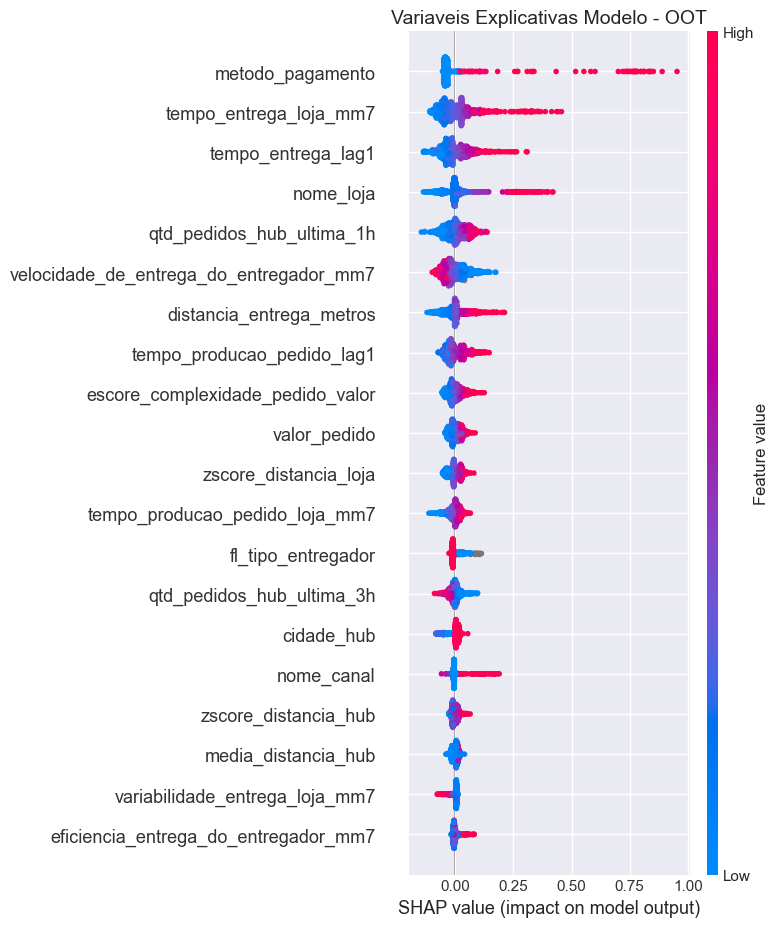

In [ ]:
plot_shap_beeswarm(model=modelo_otimizado, X=df_oot[features].sample(1000, random_state=42), titulo="Top 20 Variaveis Explicativas Modelo - OOT", max_display=20)

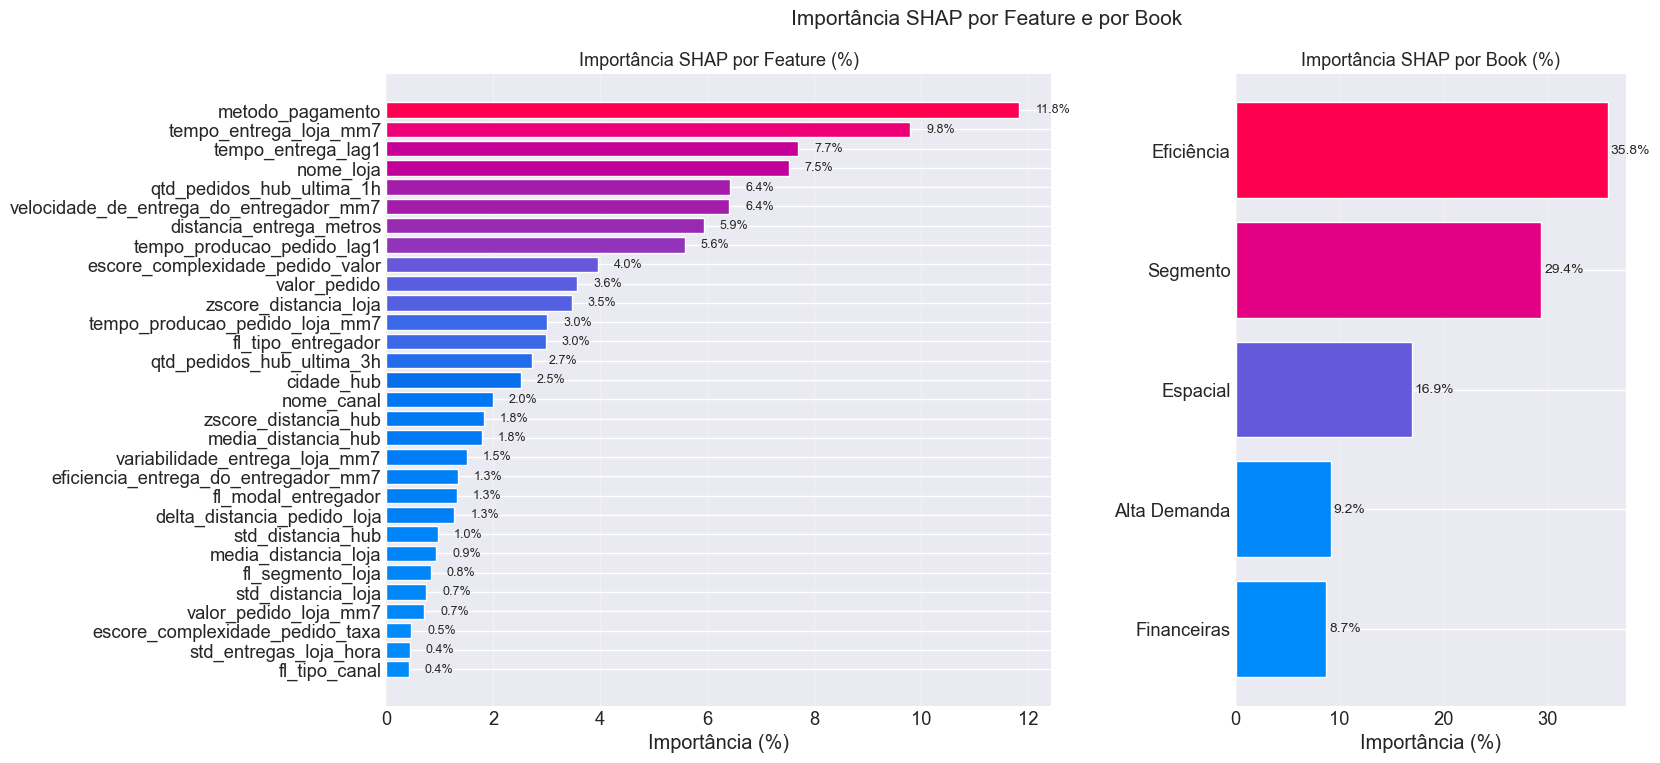

In [172]:
importance_df, shap_values = compute_shap_importance_df(model=modelo_otimizado, X=df_oot[features].sample(1000, random_state=42), max_display=30)
plot_shap_importance_with_books(
    importance_df=importance_df,
    books= {
        "Financeiras": [
        "valor_pedido",
        "valor_pedido_loja_mm7",
        "escore_complexidade_pedido_valor",
        "escore_complexidade_pedido_taxa"
        ],
        "Temporais": [
            "fl_final_de_semana",
            "fl_primeira_quinzena"
        ],
        "Segmento": [
            "fl_tipo_canal",
            "fl_segmento_loja",
            "fl_modal_entregador",
            "fl_tipo_entregador",
            "nome_canal",
            "nome_loja",
            "metodo_pagamento",
            "cidade_hub"
        ],
        "Eficiência": [
            "tempo_entrega_loja_mm7",
            "tempo_entrega_lag1",
            "tempo_producao_pedido_loja_mm7",
            "tempo_producao_pedido_lag1",
            "variabilidade_entrega_loja_mm7",
            "variabilidade_producao_pedido_loja_mm7",
            "velocidade_de_entrega_do_entregador_mm7",
            "eficiencia_entrega_do_entregador_mm7",
            "intensidade_horaria_loja",
            "intensidade_horaria_entregador",
            "std_entregas_loja_hora"
        ],
        "Alta Demanda": [
            "qtd_pedidos_loja_ultima_1h",
            "qtd_pedidos_hub_ultima_1h",
            "qtd_pedidos_hub_ultima_3h"
        ],
        "Espacial": [
            "distancia_entrega_metros",
            "delta_distancia_pedido_loja",
            "distancia_pedido_anterior_loja",
            "media_distancia_loja",
            "media_distancia_hub",
            "std_distancia_loja",
            "std_distancia_hub",
            "zscore_distancia_loja",
            "zscore_distancia_hub"
        ]
    },
    titulo="Importância SHAP por Feature e por Book"
)